# Import packages

In [7]:
from array import array
import itertools
import time
import math

from matplotlib.ticker import AutoMinorLocator, MultipleLocator

import matplotlib.pyplot as plt

import sys
sys.path.insert(0,'/usr/common/software/rootpy/')
import root_numpy
import numpy as np


#import astroML.plotting as aml
#import iminuit
import pandas as pd
import root_pandas as rpd
from root_pandas import read_root
import ROOT
from ROOT import TH1D
from matplotlib.ticker import NullFormatter
from ROOT import TLatex

Welcome to ROOTaaS 6.06/06


# File

In [26]:

#RootFile = 'InputData/17q_Bin_Mixed_Correlation_0GeVTracks.root'
#RootFile = 'InputData/13def_SE_GMB_Ratio_Old_Norm.root'
#RootFile = 'InputData/13f_4L_SE_Correlation_GMB_Ratio.root'
#RootFile = 'InputData/13def_GMB_Correlation.root'
#RootFile = 'InputData/17q_SE_Correlation_GMB_Ratio.root'
#RootFile = 'InputData/13def_SE_GMB_new_Ratio.root'

#RootFile = 'InputData/17q_SE_Correlation_GMB_Ratio.root'
#RootFile = 'InputData/17q_17p_GMB_Correlation.root'
#RootFile = 'InputData/13d_GMB_Correlation_lzt_0GeVTracks.root'
#RootFile = 'InputData/17q_SE_NN_Correlation_GMB_Ratio.root'
RootFile = 'InputData/17q_new_GMB_0GeVTracks.root'
#RootFile = 'InputData/17q_SE_NN_Correlation.root'

# Prefix

In [9]:
#prefix = '13def'
#prefix = '18b10a'
#prefix = '18b10a_MIX'
#prefix = 'p-Pb'
#prefix = 'Pb-p'
prefix = 'pp'
#prefix = 'pp_mix'
#prefix = 'pp_Same_ONly'
#prefix = '13def_Mix'

# Define Bins

In [10]:
#FIXME: Read from Corr_config.yaml
#zTbins = [0.05, 0.1, 0.2, 0.4, 0.6, 0.8, 1.0, 1.2]
zTbins = [0.05, 0.07670637, 0.11767734, 0.18053204, 0.27695915, 0.42489062, 0.65183634, 1]
pTbins = [0, 0, 12, 15]
#pTbins = [0,0,36,57]
#pTbins = [0, 0, 15, 20]

# Plot Titles

In [11]:
def Plot1D (histo, ptbin, ztbin,DNN_Bool):
    
    histo.SetTitle("Same/Mix: p_{T}^{Clus.}(%1.1f-%1.1f),  z_{T}(%1.2f-%1.2f)"
                   %(pTbins[ptbin],pTbins[ptbin+1],zTbins[ztbin],zTbins[ztbin+1]))
    
    histo.GetXaxis().SetTitle("#Delta#eta")
    histo.GetYaxis().SetTitle("#frac{1}{N_{Trig}}#frac{d^{2}N}{d#phid#eta}")
    histo.GetYaxis().SetTitleOffset(1.5)
    histo.GetXaxis().CenterTitle(1)
    histo.GetXaxis().SetTitleOffset(0.65)
    histo.GetXaxis().SetTitleSize(0.06)
    histo.GetYaxis().SetTitleSize(0.05)
    ROOT.gStyle.SetOptStat("")
    if not(DNN_Bool):
        histo.SetLineColor(2)

In [12]:
def Plot2D (histo2D,ptbin,ztbin,DNN_Bool):
    if (DNN_Bool =="inclusive"):
        histo2D.SetTitle('#gamma-MB Mixed Events: pT (%1.0f-%1.0f) zT (%1.2f-%1.2f)' 
                       %(pTbins[ptbin],pTbins[ptbin+1],zTbins[ztbin],zTbins[ztbin+1]))
    else:
        DNN_Rgn = int(Signal_DNN) + 2*(1-int(Signal_DNN))
        histo2D.SetTitle('#gamma-MB Bin Mixed: DNN%i pT (%1.0f-%1.0f) zT (%1.2f-%1.2f)' 
                       %(DNN_Rgn,pTbins[ptbin],pTbins[ptbin+1],zTbins[ztbin],zTbins[ztbin+1]))
    
    phi = histo2D.ProjectionX('phi',0,-1)
    #Integral = histo2D.Integral(0,-1,0,-1)/(2.8*16)
    #Integral = histo2D.GetBinContent(histo2D.GetMaximumBin())
    #histo2D.Scale(1/Integral)
    histo2D.GetXaxis().SetTitle("#Delta#phi")
    histo2D.GetXaxis().SetTitleSize(0.06)
    histo2D.GetYaxis().SetTitle("#Delta#eta")
    histo2D.GetYaxis().SetTitleSize(0.06)
    histo2D.GetZaxis().SetTitle("#frac{d^{2}N}{d#phid#eta}")
    
    #ROOT.gStyle.SetOptStat("")
    histo2D.GetYaxis().SetRangeUser(-1.2,1.2)
    histo2D.GetZaxis().SetTitleOffset(2)

# N Triggers

In [13]:
def Get_NTriggers(filename,prfx,ipt, Signal_DNN=True): 
    file = ROOT.TFile(filename)
    if (Signal_DNN == "inclusive"):
        ntrig_histo = file.Get('N_Triggers_pT%1.0f_%1.0f' %(pTbins[ipt],pTbins[ipt+1]))
    else:
        DNN_Rgn = int(Signal_DNN) + 2*(1-int(Signal_DNN))
        ntrig_histo = file.Get('N_DNN%i_Triggers_pT%1.0f_%1.0f' %(DNN_Rgn,pTbins[ipt],pTbins[ipt+1]))
    NTriggers = 1
    if not(ntrig_histo == None):
        if (prfx =="18b10a"):
            NTriggers = ntrig_histo.Integral(0,-1)
        else:
            NTriggers = ntrig_histo.GetEntries()
    file.Close()
    return NTriggers

# Label

In [14]:
def DrawLabel2(Signal_DNN = True):
    latex = TLatex()
    latex.SetNDC()
    latex.SetTextSize(0.05)
    if (Signal_DNN == "inclusive"):
        #latex.SetTextSize(0.04)
        if (prefix=="13def"):
            latex.DrawLatex(0.2,0.84, "#color[1]{p-Pb + Pb-p Inclusive}")
        else:
            latex.DrawLatex(0.2,0.84, "#color[1]{%s Inclusive}"%(prefix))
            
    elif (Signal_DNN):
        if (prefix=="13def"):
            latex.DrawLatex(0.2,0.84, "#color[4]{p-Pb + Pb-p Signal}")
        else:
            latex.DrawLatex(0.2,0.84, "#color[4]{%s Signal}"%(prefix))
            
    else:
        if (prefix=="13def"):
            latex.DrawLatex(0.2,0.84, "#color[2]{p-Pb + Pb-p Background}")
        else:
            latex.DrawLatex(0.2,0.84, "#color[2]{%s Background}"%(prefix))

# 2D Correlations

In [15]:
def Get2D(filename, ipt, izt, Signal_DNN=True):
    file = ROOT.TFile(filename)
    
    
    if (Signal_DNN == "inclusive"):
        histoDNN = file.Get('Correlation__pT%1.0f_%1.0f__zT%1.0f_zT%1.0f' 
                            %(pTbins[ipt],pTbins[ipt+1],100*zTbins[izt],100*zTbins[izt+1]))
        
        
    else:
        DNN_Rgn = int(Signal_DNN) + 2*(1-int(Signal_DNN)) #convert bool to DNN_1 (Sgn) or DNN_2 (Bkgd)
        histoDNN = file.Get('DNN%i_Correlation__pT%1.0f_%1.0f__zT%1.0f_zT%1.0f' 
                            %(DNN_Rgn,pTbins[ipt],pTbins[ipt+1],100*zTbins[izt],100*zTbins[izt+1]))
        

    print('Correlation__pT%1.0f_%1.0f__zT%1.0f_zT%1.0f' 
                            %(pTbins[ipt],pTbins[ipt+1],100*zTbins[izt],100*zTbins[izt+1]))
    print histoDNN
    histoDNN.SetTitle('#gamma-hadron [High DNN] pT (%1.0f-%1.0f) zT (%1.2f-%1.2f)' 
                       %(pTbins[ipt],pTbins[ipt+1],zTbins[izt],zTbins[izt+1]))
    
    histoDNN.RebinX(2)
    histoDNN.SetDirectory(0)
    Plot2D(histoDNN,ipt,izt,Signal_DNN)
    
    file.Close()
    return histoDNN

In [16]:
def Loop2D(filename,Signal_DNN=True):
    if not(Signal_DNN =="inclusive"):
        DNN_Rgn = int(Signal_DNN) + 2*(1-int(Signal_DNN))
    canvases = []
    ROOT.gStyle.SetOptStat("")
    for ipt in range(3):
        if(ipt > 0): continue
        canvases.append(ROOT.TCanvas("Canvas%i"%(ipt),"Canvas",6000,4000))
        canvases[ipt].Divide(3,2)
        for izt in range(6):
            #histoDNN = Get2D(filename,ipt,izt,Signal_DNN)
            histoDNN = Get2D(filename,ipt+2,izt,Signal_DNN)
            canvases[ipt].cd(izt+1)
            gpad1 = canvases[ipt].cd(izt+1)
            gpad1.SetLeftMargin(0.15)
            histoDNN.Draw("SURF2")
            canvases[ipt].SetLeftMargin(0.15)
    return canvases


Correlation__pT12_15__zT5_zT8
<ROOT.TH2D object ("DNN1_Correlation__pT12_15__zT5_zT8") at 0x561e717b9550>
Correlation__pT12_15__zT8_zT12
<ROOT.TH2D object ("DNN1_Correlation__pT12_15__zT8_zT12") at 0x561e719d5ef0>
Correlation__pT12_15__zT12_zT18
<ROOT.TH2D object ("DNN1_Correlation__pT12_15__zT12_zT18") at 0x561e719ae760>
Correlation__pT12_15__zT18_zT28
<ROOT.TH2D object ("DNN1_Correlation__pT12_15__zT18_zT28") at 0x561e719c0610>
Correlation__pT12_15__zT28_zT42
<ROOT.TH2D object ("DNN1_Correlation__pT12_15__zT28_zT42") at 0x561e719b8710>
Correlation__pT12_15__zT42_zT65
<ROOT.TH2D object ("DNN1_Correlation__pT12_15__zT42_zT65") at 0x561e7193aef0>


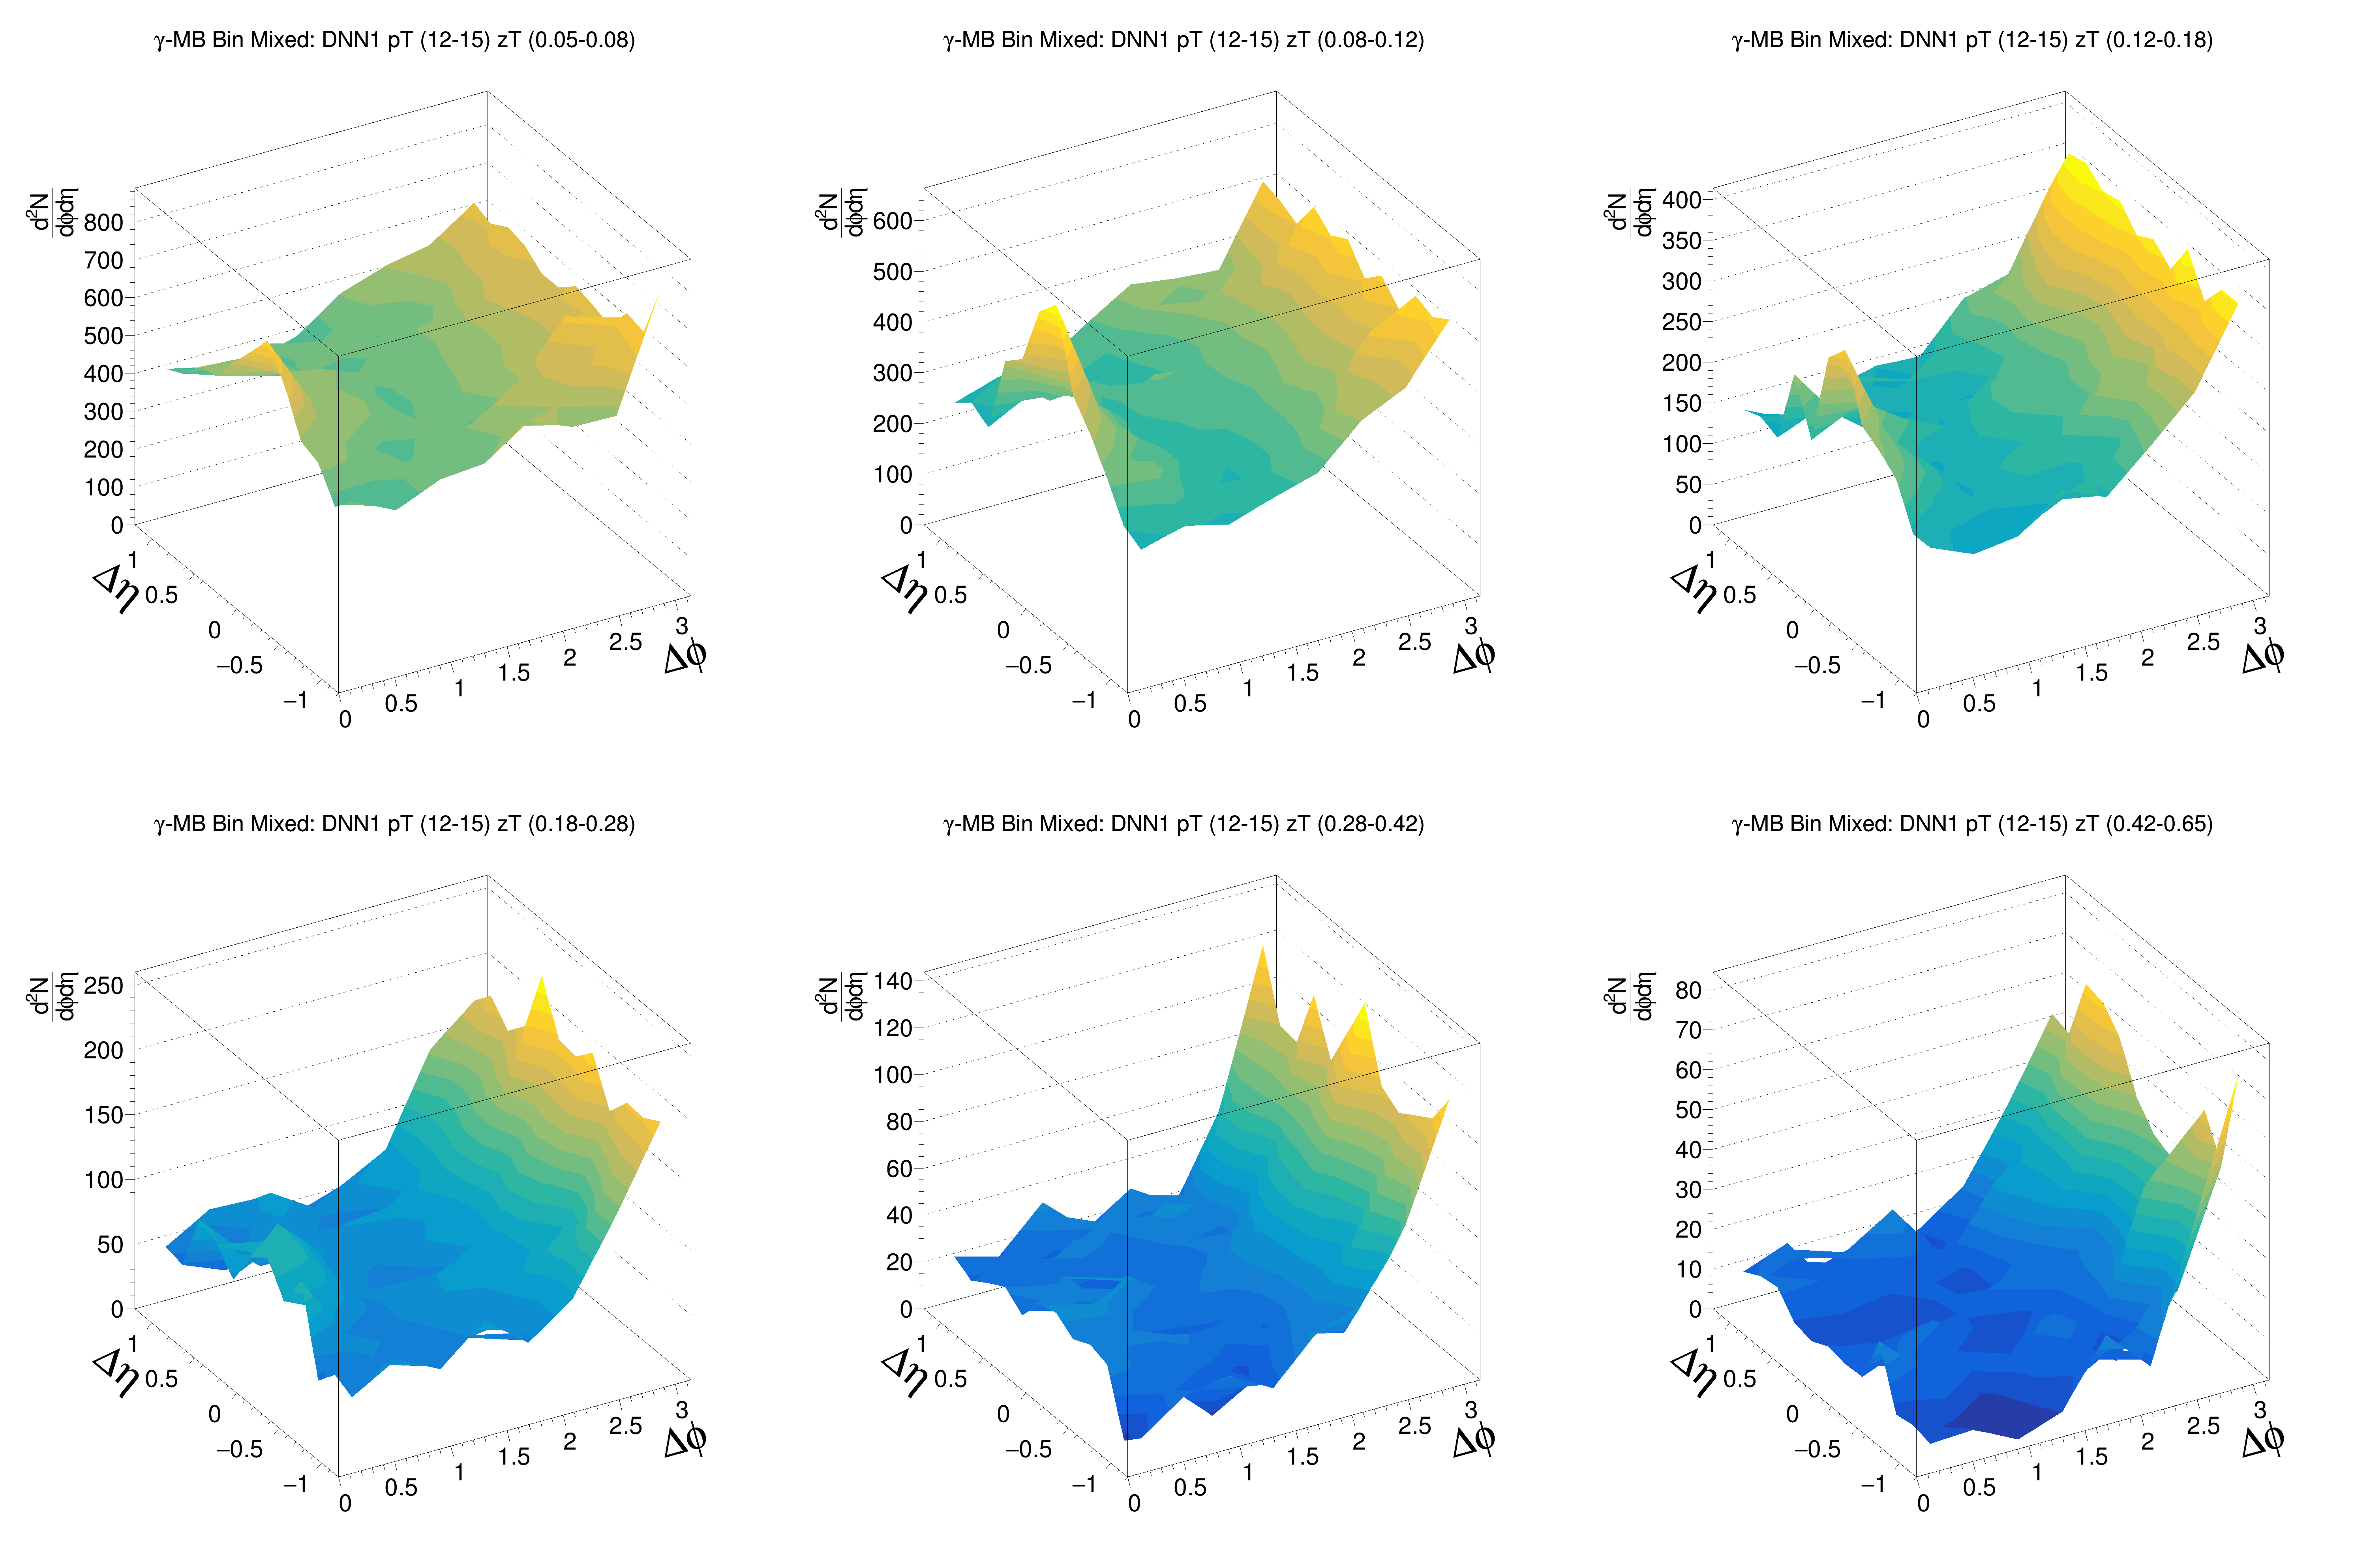

Info in <TCanvas::Print>: pdf file pics/2D_pp_signal_Correlations.pdf has been created


In [17]:
#Signal_DNN ="inclusive"
Signal_DNN = True
if (Signal_DNN =="inclusive"):
    region="inclusive"
elif(Signal_DNN):
    region="signal"
else:
    region="background"
    
canvases = Loop2D(RootFile,Signal_DNN)
ROOT.disableJSVis()
for ipt in range(3):
    if (ipt > 0): continue
    canvases[ipt].Draw()
    canvases[ipt].SaveAs('pics/2D_%s_%s_Correlations.pdf'%(prefix,region))

Correlation__pT12_15__zT12_zT18
<ROOT.TH2D object ("DNN1_Correlation__pT12_15__zT12_zT18") at 0x561e71c850e0>
Correlation__pT12_15__zT12_zT18
<ROOT.TH2D object ("Correlation__pT12_15__zT12_zT18") at 0x561e6cebdf90>


TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: c


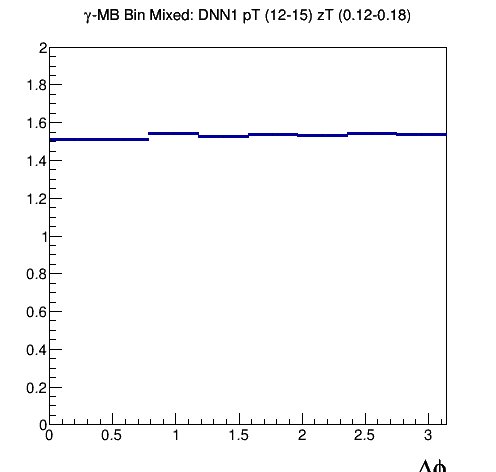

In [38]:
DNN1 = Get2D(RootFile, 2, 2, Signal_DNN=True)
Incl = Get2D(RootFile,2,2,Signal_DNN="inclusive")
DNN1.Divide(Incl)
c = ROOT.TCanvas('c','c',500,500)
#DNN1.Draw("surf2")
phi = DNN1.ProjectionX("phi",0,-1)
phi.GetYaxis().SetRangeUser(0,2)
phi.Draw()
c.Draw()


# Phi Projection

<sup>**NOTE**: The DNN corresponding to one photon is reflected in the naming scheme of histograms, where DNN1_Histo is signal (the same here) but background (DNN corresponding to 2 photons) is DNN2_Histo. Here, the DNN variable is a boolian corresponding to *true for signal*, *false for background*<sup>

In [2]:
def GetPhiProj(filename,prfx,ipt, izt, Signal_DNN=True, doZYAM=True,DoSys=False):
    file = ROOT.TFile(filename)

    if (DoSys):
        SysE = "_Stat+Sys"
    else:
        SysE = ""
    
    if (Signal_DNN == "inclusive"):
        histo2D = file.Get('Correlation__pT%1.0f_%1.0f__zT%1.0f_zT%1.0f' 
                        %(pTbins[ipt],pTbins[ipt+1],100*zTbins[izt],100*zTbins[izt+1]))
        
        Eta_Axis = histo2D.GetYaxis()
        PhiProjection = histo2D.ProjectionX('Inclusive_PhiProjection__pT_%1.0f_%1.0f__zt_%1.0f_%1.0f%s' 
                                      %(pTbins[ipt],pTbins[ipt+1],100*zTbins[izt],
                                        100*zTbins[izt+1],SysE),Eta_Axis.FindBin(-0.6),Eta_Axis.FindBin(0.6))
                                        #10*zTbins[izt+1]),5,11)
    
    else:
        DNN_Rgn = int(Signal_DNN) + 2*(1-int(Signal_DNN)) #convert bool to DNN_1 (Sgn) or DNN_2 (Bkgd)
        histo2D = file.Get('DNN%i_Correlation__pT%1.0f_%1.0f__zT%1.0f_zT%1.0f' 
                            %(DNN_Rgn,pTbins[ipt],pTbins[ipt+1],100*zTbins[izt],100*zTbins[izt+1]))
        
        Eta_Axis = histo2D.GetYaxis()
        PhiProjection = histo2D.ProjectionX('DNN%i_PhiProjection__pT_%1.0f_%1.0f__zt_%1.0f_%1.0f%s' 
                                      %(DNN_Rgn,pTbins[ipt],pTbins[ipt+1],100*zTbins[izt],
                                        100*zTbins[izt+1],SysE),Eta_Axis.FindBin(-0.6),Eta_Axis.FindBin(0.6))
                                        #10*zTbins[izt+1]),5,11)
    
    PhiProjection.SetDirectory(0)
    PhiProjection.Rebin(2)
    PhiProjection.Scale(1.0/1.2) #scale by eta region
    PhiProjection.SetMarkerStyle(20)
    
    ntriggers = Get_NTriggers(filename,prfx,ipt, Signal_DNN)
    if not(ntriggers == None):
        PhiProjection.Scale(1.0/ntriggers) #per trigger yield
        
        
    Plot1D(PhiProjection,ipt,izt,Signal_DNN)    
    if(doZYAM):
        LE_Proj,legend = GetLEProj(filename, ipt, izt, Signal_DNN)
        Subtract_LE(PhiProjection,LE_Proj,DoSys)#Stat+Sys Bool (True, False = Just Stat.)
        #Subtract_ZYAM(PhiProjection)
    
    file.Close()
    return PhiProjection

### LE LINE

### Subtract Large Eta

In [61]:
def Subtract_LE(PhiProjection,LE_Proj,DoSys=False):
    nbins = PhiProjection.GetSize()-2 #underflow,overflow    

    LE_min = (LE_Proj.GetXaxis().FindBin(0.4)) #avoid bias of isolation in this region  
    LE_max = (LE_Proj.GetXaxis().FindBin(1.4))
    LE_N = LE_max-LE_min+1
    LE = LE_Proj.Integral(LE_min,LE_max)/(LE_N)
    
    LE_Error = 0
    for NError in range(LE_min,LE_max):
        LE_Error += (LE_Proj.GetBinError(NError))**2
    print "Quad Sum of Errors:",LE_Error
    LE_Error = math.sqrt(LE_Error)
    LE_Error = LE_Error/math.sqrt(LE_N)
    print "SQRT N:",math.sqrt(LE_N)
    print "After SQRT and /SQRT(N):",LE_Error

    for i in range(nbins+1):
            y = PhiProjection.GetBinContent(i)
            y_error = PhiProjection.GetBinError(i)
            new_y = y-LE
            PhiProjection.SetBinContent(i,new_y)
            if (DoSys):
                new_y_error = math.sqrt(y_error**2 + LE_Error**2)
            else:
                new_y_error = y_error    
            PhiProjection.SetBinError(i,new_y_error)

# Eta Projection

In [20]:
def GetEtaProj(filename, ipt, izt, Signal_DNN=True):
    file = ROOT.TFile(filename)
        
    
    if (Signal_DNN == "inclusive"):
        histo2D = file.Get('Correlation__pT%1.0f_%1.0f__zT%1.0f_zT%1.0f' 
                        %(pTbins[ipt],pTbins[ipt+1],100*zTbins[izt],100*zTbins[izt+1]))
        
        Phi_Axis = histo2D.GetXaxis()
        EtaProjection = histo2D.ProjectionY('EtaProjection__pT_%1.0f_%1.0f__zt_%1.0f_%1.0f' 
                                  %(pTbins[ipt],pTbins[ipt+1],100*zTbins[izt],
                                    100*zTbins[izt+1]),Phi_Axis.FindBin(0.0),Phi_Axis.FindBin(math.pi/2));
    
    else:
        DNN_Rgn = int(Signal_DNN) + 2*(1-int(Signal_DNN)) #convert bool to DNN_1 (Sgn) or DNN_2 (Bkgd)
        histo2D = file.Get('DNN%i_Correlation__pT%1.0f_%1.0f__zT%1.0f_zT%1.0f' 
                            %(DNN_Rgn,pTbins[ipt],pTbins[ipt+1],100*zTbins[izt],100*zTbins[izt+1]))
        
        Phi_Axis = histo2D.GetXaxis()
        EtaProjection = histo2D.ProjectionY('DNN%i_EtaProjection__pT_%1.0f_%1.0f__zt_%1.0f_%1.0f' 
                                  %(DNN_Rgn,pTbins[ipt],pTbins[ipt+1],100*zTbins[izt],
                                    100*zTbins[izt+1]),Phi_Axis.FindBin(0.0),Phi_Axis.FindBin(math.pi/2));
      
    
    EtaProjection.SetDirectory(0)
    EtaProjection.Scale(1.0/1.2) #scale by eta region
    ntriggers = Get_NTriggers(filename, prefix,ipt, Signal_DNN)
    #print ntriggers
    EtaProjection.Scale(1.0/ntriggers) #per trigger yield
    
    EtaProjection.SetLineWidth(1)
    
    Plot1D(EtaProjection,ipt,izt,Signal_DNN)
    
    #zyam = EtaProjection.Integral(11,13)/3
    # how do I plot ZYAM, perhaps in both cases?
    #print('ZYAM=%f'%(zyam))
  
    #file.Close()
    return EtaProjection

In [21]:
def GetLE_Line(LE_Proj):
    LE_min_n = (LE_Proj.GetXaxis().FindBin(-1.4)) #avoid bias of isolation in this region  
    LE_max_n = (LE_Proj.GetXaxis().FindBin(-0.8)-1)
    LE_N = LE_max_n-LE_min_n+1
    LE_value = LE_Proj.Integral(LE_min_n,LE_max_n)
    
    LE_min_p = (LE_Proj.GetXaxis().FindBin(0.8)) #avoid bias of isolation in this region  
    LE_max_p = (LE_Proj.GetXaxis().FindBin(1.4))
    LE_N += LE_max_p-LE_min_p+1
    LE_value += LE_Proj.Integral(LE_min_p,LE_max_p)
    LE_value = LE_value/(LE_N)
    print LE_N
    
    #Errors
    Temp_Error = 0
    for NError in range(LE_min_n,LE_max_n+1):
        Temp_Error += (LE_Proj.GetBinError(NError))**2
    print Temp_Error
    
    for NError in range(LE_min_p,LE_max_p+1):
        Temp_Error += (LE_Proj.GetBinError(NError))**2
    print Temp_Error
    
    Temp_Error = math.sqrt(Temp_Error)
    print Temp_Error
    print LE_N
    LE_Error = Temp_Error/math.sqrt(LE_N)
    print LE_Error
    #LE_Error = LE_Error/math.sqrt(10000)
    
    #LE TGraph
    NBins = LE_Proj.GetSize()-2
    LE_Line = ROOT.TGraphErrors()
    for NBin in range(0,NBins+1):
        LE_Line.SetPoint(NBin,(-1.4+0.2*NBin),LE_value)
        LE_Line.SetPointError(NBin,0,LE_Error)
    
    LE_Line.SetFillColorAlpha(1, 0.2);
    #LE_Line = ROOT.TLine(0,LE_value,math.pi,LE_value)
    #LE_Line.SetLineColorAlpha(1, 0.9)
    #LE_Line.SetLineWidth(5)
    ROOT.SetOwnership(LE_Line, 0)
    #legend
    legend = ROOT.TLegend(0.74,0.78,0.89,0.88)
    legend.AddEntry(LE_Line, "0.8 <|#eta| < 1.4","l")
    ROOT.SetOwnership(legend, 0)
    return LE_Line

# Loop and Plot Eta

In [26]:
def LoopandPlotEta(Region):
    for ptbin in range(3):
        if(ptbin > 0): continue
        ptbin = ptbin+2
        canvases = ROOT.TCanvas("canv_phi","canv_phi",1100,700)
        #canvases.SetLeftMargin(0.1)
        if (Region=="regions"):
            canvases.Divide(4,3)
        elif(Region=="inclusive"):
            canvases.Divide(3,2)
            #print "hi"
        for ztbin in range(6):

            #grab
            if (Region=="regions"):
                #if(ztbin>4): continue
                hsig = GetEtaProj(RootFile,ptbin,ztbin,True) #change DNN
                hbkg = GetEtaProj(RootFile,ptbin,ztbin,False)
                sig_Line = GetLE_Line(hsig)
                bkg_Line = GetLE_Line(hbkg)
                ymax = 1.2*max(hsig.GetMaximum(),hbkg.GetMaximum())
                hsig.GetYaxis().SetRangeUser(0,ymax)
                hbkg.GetYaxis().SetRangeUser(0,ymax)
                canvases.cd(ztbin*2+1)
                ROOT.gPad.SetLeftMargin(0.18)
                ROOT.gPad.SetRightMargin(0.0)
                hsig.Draw()
                sig_Line.Draw("SAMEE3")
                DrawLabel2(True)
                
            elif(Region=="inclusive"):
                hsig = GetEtaProj(RootFile,ptbin,ztbin,"inclusive")
                sig_Line = GetLE_Line(hsig)
                ymax = 1.2*(hsig.GetMaximum())
                hsig.GetYaxis().SetRangeUser(0,ymax)
                canvases.cd(ztbin+1)
                ROOT.gPad.SetLeftMargin(0.18)
                ROOT.gPad.SetRightMargin(0.0)
                hsig.Draw()
                sig_Line.Draw("SAMEE3")
                DrawLabel2("inclusive")
            
            #hsig.SetMarkerStyle(15)
            #hsig.SetMarkerSize(4)
            hsig.SetMarkerColor(4)
            

            if (Region=="regions"):
                #if(ztbin>4): continue
                canvases.cd(ztbin*2+2)
                ROOT.gPad.SetLeftMargin(0.18)
                ROOT.gPad.SetRightMargin(0.0)
                hbkg.SetMarkerStyle(15)
                hbkg.SetMarkerColor(2)
                hbkg.Draw()
                bkg_Line.Draw("SAMEE3")
                DrawLabel2(False)
                #legend.AddEntry(hbkg,"Low DNN","l")
                #legend.Draw("same")
    
    canvases.Draw()
    if (Region=="regions"):
        canvases.SaveAs("pics/%s_Eta_2DNN.pdf"%(prefix))
        canvases.SaveAs("pics/%s_Eta_2DNN.png"%(prefix))
    if (Region=="inclusive"):
        canvases.SaveAs("pics/%s_Eta_Inclusive.pdf"%(prefix))
        canvases.SaveAs("pics/%s_Eta_Inclusive.png"%(prefix))
        
    return canvases

6
6.69285777428e-06
2.52408025565e-05
0.00502402254737
6
0.00205104861622
6
4.37057243446e-06
1.63911747603e-05
0.00404860158083
6
0.00165283467414
6
2.19649868425e-06
8.08661025807e-06
0.00284369658334
6
0.00116093426874
6
8.47301892571e-07
3.17772587767e-06
0.00178261770373
6
0.0007277506301
6
2.83667409446e-07
1.19112474179e-06
0.00109138661426
6
0.000445556719508
6
1.74023107757e-07
6.19332314959e-07
0.000786976692768
6
0.000321281889457


TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: canv_phi


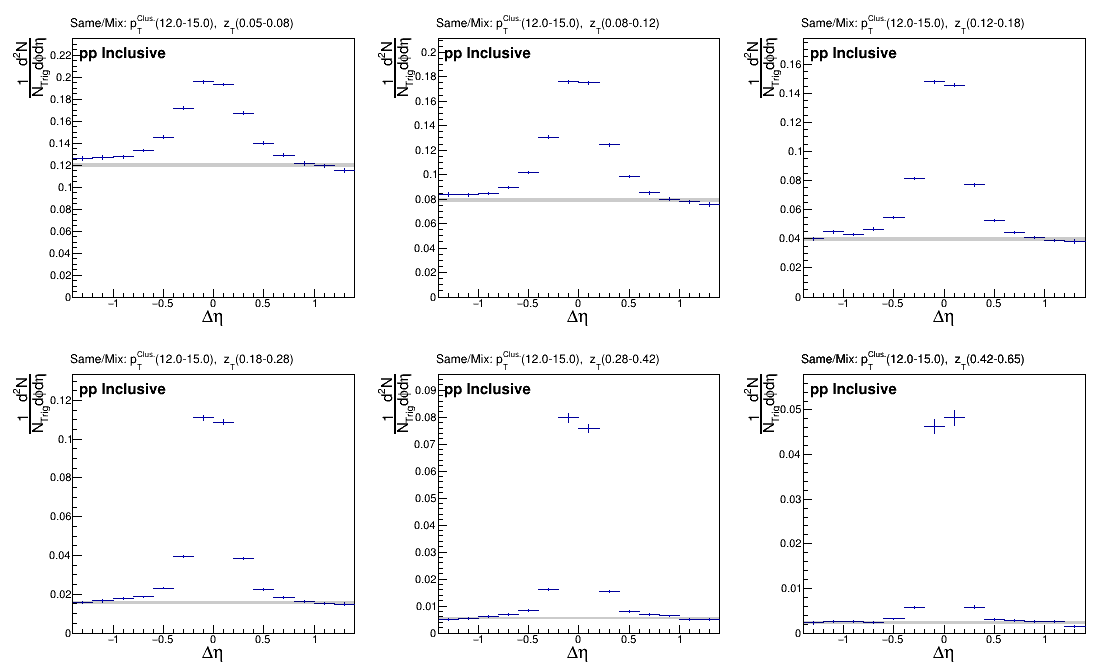

<ROOT.TCanvas object ("canv_phi") at 0x560262cfa850>

Info in <TCanvas::Print>: pdf file pics/pp_Eta_Inclusive.pdf has been created
Info in <TCanvas::Print>: png file pics/pp_Eta_Inclusive.png has been created


In [32]:
LoopandPlotEta("inclusive")
#LoopandPlotEta("regions")

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: canv_phi


4.92858837795
3.60402545451
2.03161108795
0.897974512343
0.362021668902
0.171044662744


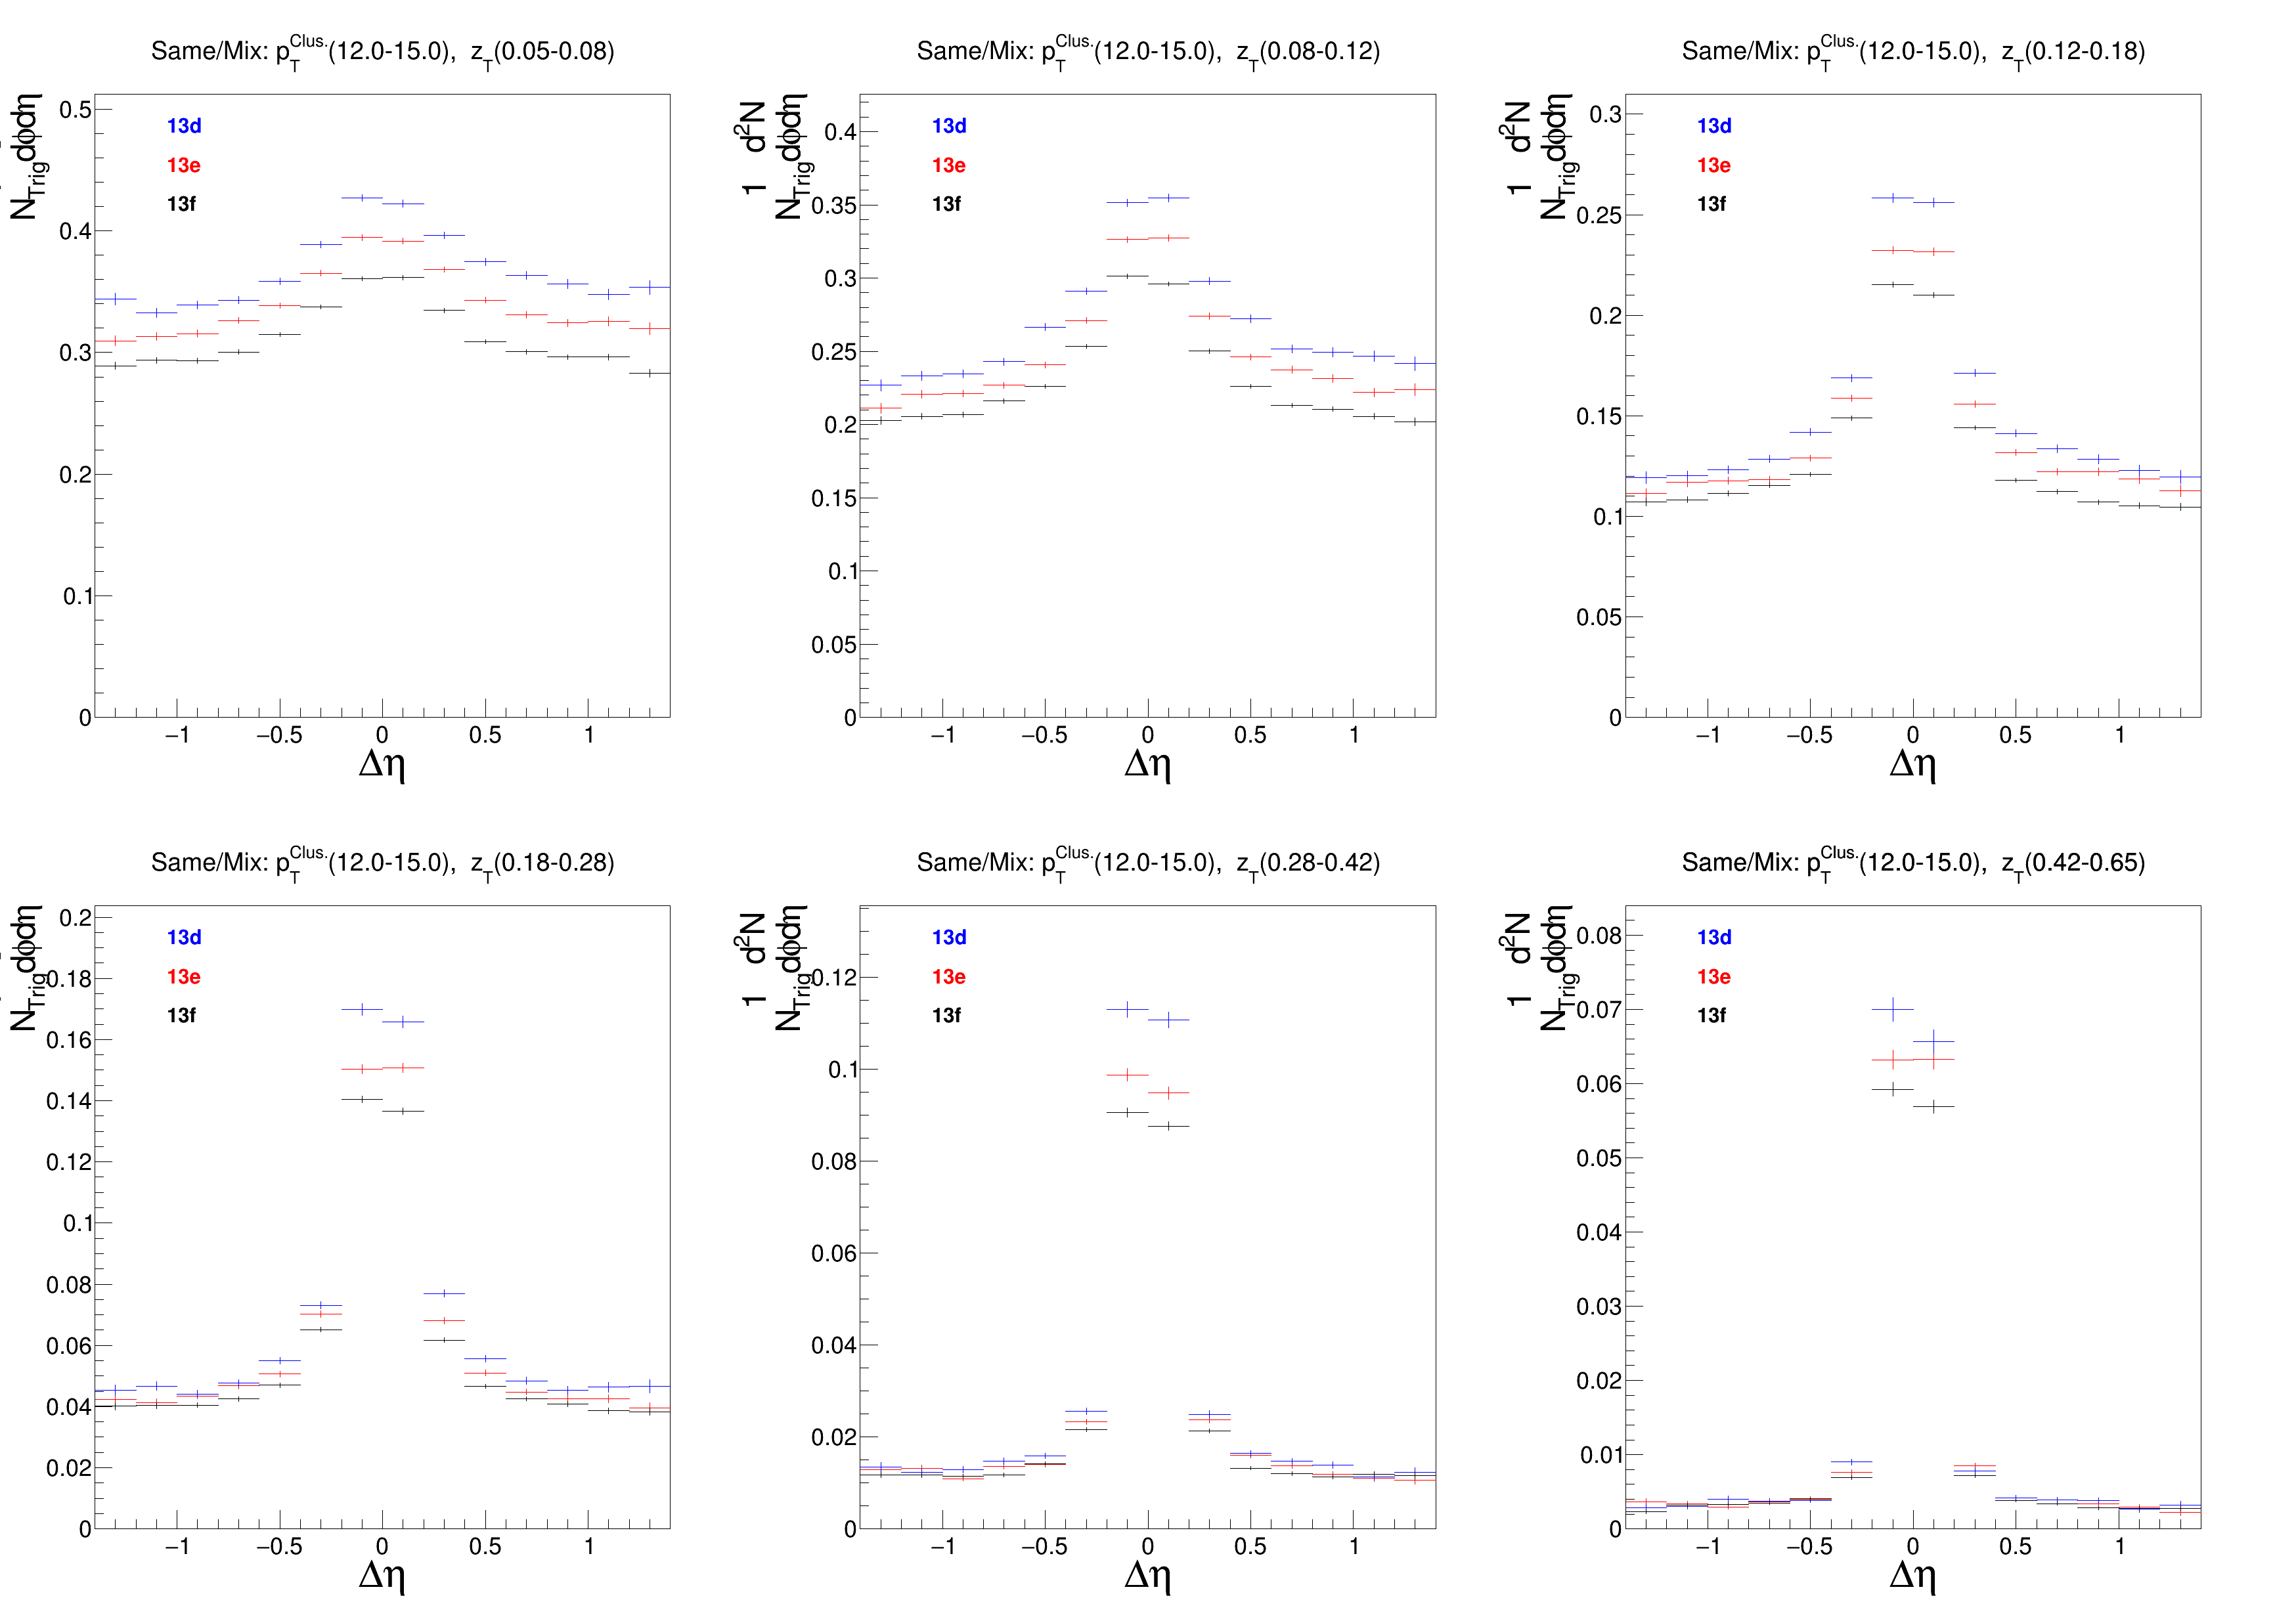

In [67]:

RootFile1 = 'InputData/13e_SE_NN_Correlation_GMB_Ratio.root'
RootFile2 = 'InputData/13d_SE_NN_Correlation_GMB_Ratio.root'
RootFile3 = 'InputData/13f_SE_NN_Correlation_GMB_Ratio.root'

#RootFile1 = 'InputData/13e_4L_SE_Correlation_GMB_Ratio.root'
#RootFile2 = 'InputData/13d_4L_SE_Correlation_GMB_Ratio.root'
#RootFile3 = 'InputData/13f_4L_SE_Correlation_GMB_Ratio.root'
#RootFile2 = 'InputData/13d_4L_SE_Correlation.root'
legend = [3]
for ptbin in range(3):
    if(ptbin > 0): continue
    ptbin = ptbin+2
    canvases = ROOT.TCanvas("canv_phi","canv_phi",3500,2500)
    canvases.Divide(3,2)
    legend[ptbin-2] = ROOT.TLegend(0.74,0.78,0.89,0.88)
    for ztbin in range(6):
    
        #grab
        hsig = GetEtaProj(RootFile1,ptbin,ztbin,"inclusive") #no subtraction, change DNN
        hsig2 = GetEtaProj(RootFile2,ptbin,ztbin,"inclusive")
        hsig3 = GetEtaProj(RootFile3,ptbin,ztbin,"inclusive")

    
        print hsig3.Integral(0,-1)
        
        #hsig = GetEtaProj(RootFile1,ptbin,ztbin,True) #no subtraction, change DNN
        #hsig2 = GetEtaProj(RootFile2,ptbin,ztbin,True)
        #hsig2 = GetEtaProj(RootFile2,ptbin,ztbin,True)

        
        #same scale
        ymax = 1.2*max(hsig.GetMaximum(),hsig2.GetMaximum())
        hsig.GetYaxis().SetRangeUser(0,ymax)
        hsig2.GetYaxis().SetRangeUser(0,ymax)    
    
        #Signal
        canvases.cd(ztbin+1)
        hsig.SetMarkerColor(2)
        hsig.SetLineColor(2)
        hsig.SetLineWidth(1)
        hsig.Draw()
        #hsig2.SetMarkerStyle(15)
        #hsig2.Scale(0.94)
        hsig2.SetMarkerColor(4)
        hsig2.SetLineColor(4)
        hsig2.SetLineWidth(1)
        hsig2.Draw("same")
        
        
        hsig3.SetMarkerColor(1)
        hsig3.SetMarkerColor(1)
        hsig3.SetLineColor(1)
        hsig3.SetLineWidth(1)
        hsig3.Draw("same")
        
        latex = TLatex()
        latex.SetNDC()
        latex.SetTextSize(0.03)
#         latex.DrawLatex(0.2,0.85, "#color[3]{p+Pb}")
#         latex.DrawLatex(0.2,0.80, "#color[4]{Pb+p}")

        latex.DrawLatex(0.2,0.85, "#color[4]{13d}")
        latex.DrawLatex(0.2,0.80, "#color[2]{13e}")
        latex.DrawLatex(0.2,0.75, "#color[1]{13f}")
        
        if(ztbin < 1):
            legend[ptbin-2].AddEntry(hsig, "13d","l")
            #legend[ptbin-2].AddEntry(hsig2, "13d","l")
        #legend[ptbin-2].Draw()
        #SetOwnership(legend, 0)
        
    
    canvases.Draw()   
    #canvases.SaveAs("pics/13fd_overlay_Eta_Same_Mix_Projections_Trigger_pt_%i.png"%(ptbin))

# Absolute Track Distributions

In [34]:
def GetEta(filename, ipt, izt, Signal_DNN=True):
    file = ROOT.TFile(filename)
        
    
    if (Signal_DNN == "inclusive"):
        histo2D = file.Get('track_phi_eta__pT%1.0f_%1.0f__zT%1.0f_zT%1.0f' 
                        %(pTbins[ipt],pTbins[ipt+1],100*zTbins[izt],100*zTbins[izt+1]))
        
        Phi_Axis = histo2D.GetXaxis()
        EtaProjection = histo2D.ProjectionY('EtaProjection__pT_%1.0f_%1.0f__zt_%1.0f_%1.0f' 
                                  %(pTbins[ipt],pTbins[ipt+1],100*zTbins[izt],
                                    100*zTbins[izt+1]),0,-1)
                                            #Phi_Axis.FindBin(0.0),Phi_Axis.FindBin(math.pi/2));
    
    else:
        DNN_Rgn = int(Signal_DNN) + 2*(1-int(Signal_DNN)) #convert bool to DNN_1 (Sgn) or DNN_2 (Bkgd)
        histo2D = file.Get('track_phi_eta__pT%1.0f_%1.0f__zT%1.0f_zT%1.0f' 
                            %(DNN_Rgn,pTbins[ipt],pTbins[ipt+1],100*zTbins[izt],100*zTbins[izt+1]))
        
        Phi_Axis = histo2D.GetXaxis()
        EtaProjection = histo2D.ProjectionY('DNN%i_EtaProjection__pT_%1.0f_%1.0f__zt_%1.0f_%1.0f' 
                                  %(DNN_Rgn,pTbins[ipt],pTbins[ipt+1],100*zTbins[izt],
                                    100*zTbins[izt+1]),0,-1)
                                            #Phi_Axis.FindBin(0.0),Phi_Axis.FindBin(math.pi/2));
      
    
    EtaProjection.SetDirectory(0)
    #EtaProjection.Scale(1.0/1.2) #scale by eta region
    ntriggers = Get_NTriggers(filename, prefix,ipt, Signal_DNN)
    print ntriggers
    EtaProjection.Scale(1.0/ntriggers) #per trigger yield
    
    EtaProjection.SetLineWidth(1)
    
    Plot1D(EtaProjection,ipt,izt,Signal_DNN)
    
    #zyam = EtaProjection.Integral(11,13)/3
    # how do I plot ZYAM, perhaps in both cases?
    #print('ZYAM=%f'%(zyam))
  
    #file.Close()
    return EtaProjection

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: canv_phi


67186.0
55054.0
114893.0
67186.0
55054.0
114893.0
67186.0
55054.0
114893.0
67186.0
55054.0
114893.0
67186.0
55054.0
114893.0
67186.0
55054.0
114893.0


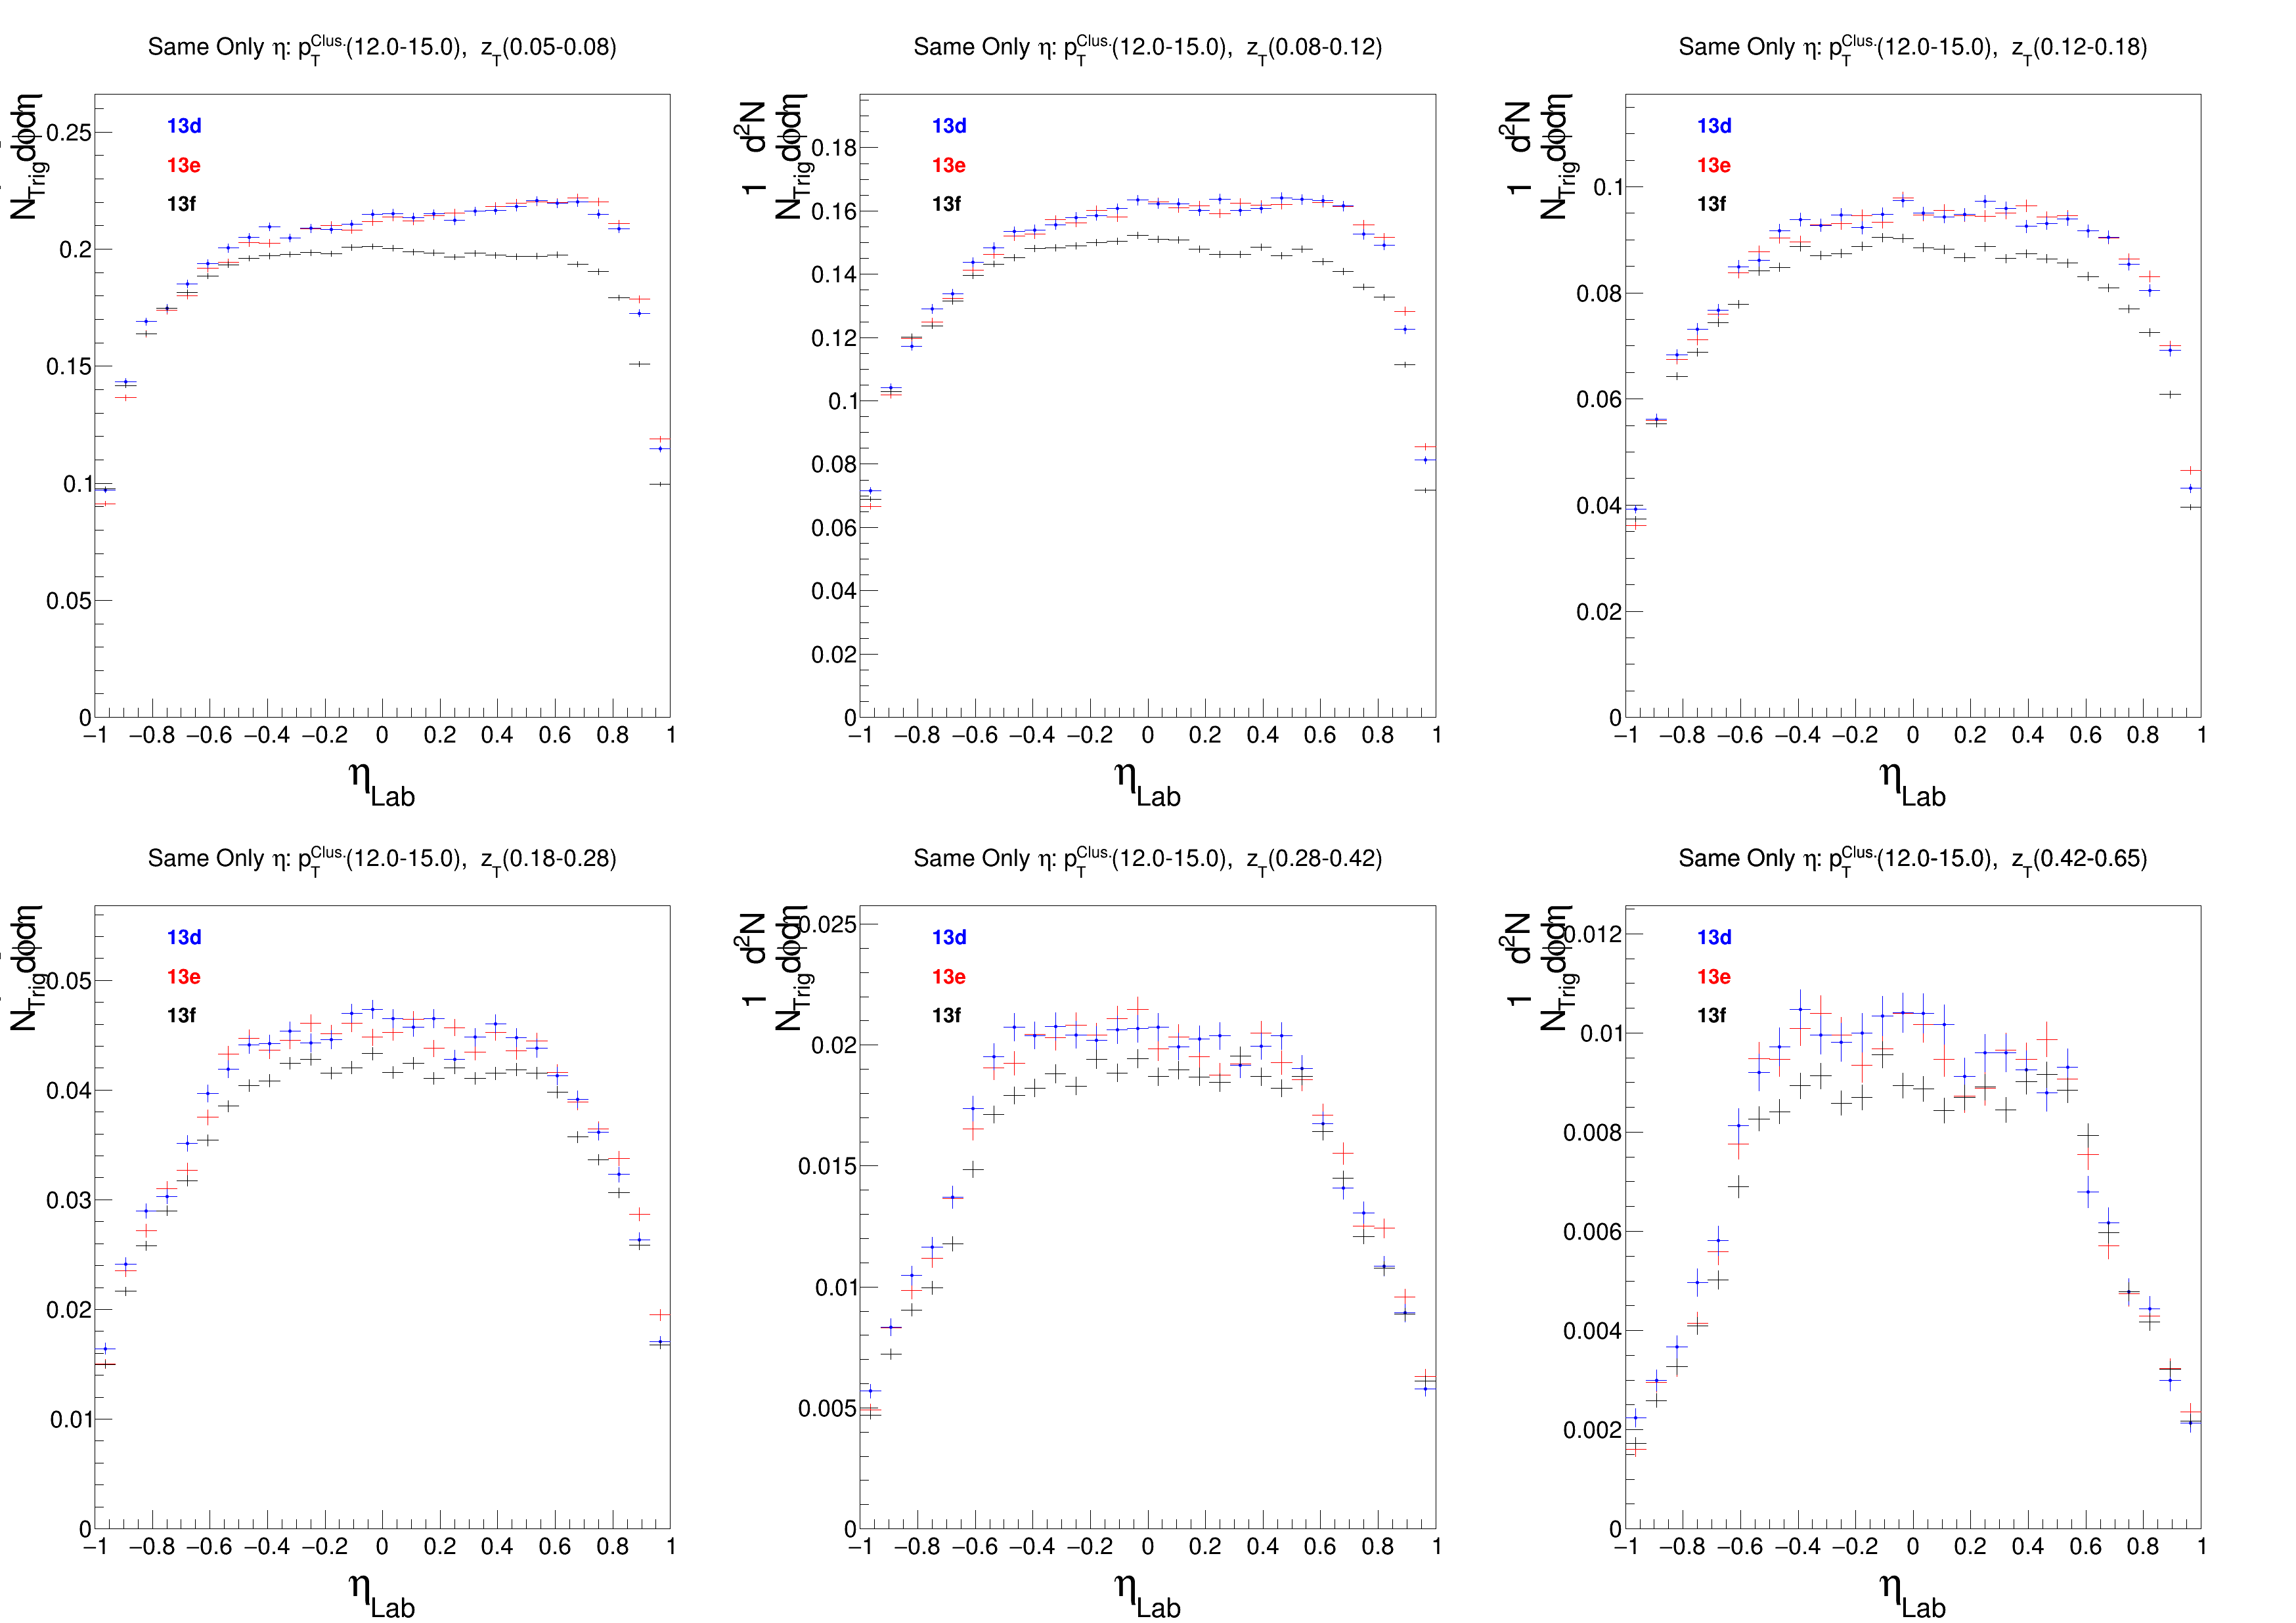

In [129]:
#RootFile1 = 'InputData/13f_4L_SE_Correlation_GMB_Ratio.root'
#RootFile2 = 'InputData/13d_4L_SE_Correlation_GMB_Ratio.root'
#RootFile1 = 'InputData/13f_4L_SE_Correlation.root'
#RootFile2 = 'InputData/13d_4L_SE_Correlation.root'
RootFile1 = 'InputData/13e_4L_SE_NN_Correlation.root'
RootFile2 = 'InputData/13d_4L_SE_NN_Correlation.root'
RootFile3 = 'InputData/13f_4L_SE_NN_Correlation.root'
legend = [3]
for ptbin in range(3):
    if(ptbin > 0): continue
    ptbin = ptbin+2
    canvases = ROOT.TCanvas("canv_phi","canv_phi",3500,2500)
    canvases.Divide(3,2)
    legend[ptbin-2] = ROOT.TLegend(0.74,0.78,0.89,0.88)
    for ztbin in range(6):
    
        #grab
        hsig = GetEta(RootFile1,ptbin,ztbin,"inclusive") #no subtraction, change DNN
        hsig2 = GetEta(RootFile2,ptbin,ztbin,"inclusive")
        hsig3 = GetEta(RootFile3,ptbin,ztbin,"inclusive")
        
        #hsig = GetEtaProj(RootFile1,ptbin,ztbin,True) #no subtraction, change DNN
        #hsig2 = GetEtaProj(RootFile2,ptbin,ztbin,True)
        #hsig2 = GetEtaProj(RootFile2,ptbin,ztbin,True)

        
        #same scale
        ymax = 1.2*max(hsig.GetMaximum(),hsig2.GetMaximum())
        hsig.GetYaxis().SetRangeUser(0,ymax)
        hsig2.GetYaxis().SetRangeUser(0,ymax)    
        hsig3.GetYaxis().SetRangeUser(0,ymax)
    
        #Signal
        canvases.cd(ztbin+1)
        hsig.SetMarkerColor(2)
        hsig.SetLineColor(2)
        hsig.SetLineWidth(1)
        hsig.SetTitle("Same Only #eta: p_{T}^{Clus.}(%1.1f-%1.1f),  z_{T}(%1.2f-%1.2f)"
                   %(pTbins[ptbin],pTbins[ptbin+1],zTbins[ztbin],zTbins[ztbin+1]))
        hsig.Draw()
        hsig2.SetMarkerStyle(15)
        #hsig2.Scale(0.94)
        hsig2.SetMarkerColor(4)
        hsig2.SetLineColor(4)
        hsig2.SetLineWidth(1)
        hsig.GetXaxis().SetTitleOffset(0.9)
        hsig.GetXaxis().SetTitle("#eta_{Lab}")
        hsig2.Draw("same")
        
        hsig3.SetMarkerColor(1)
        hsig3.SetMarkerColor(1)
        hsig3.SetLineColor(1)
        hsig3.SetLineWidth(1)
        hsig3.Draw("same")
        
        latex = TLatex()
        latex.SetNDC()
        latex.SetTextSize(0.03)
#         latex.DrawLatex(0.2,0.85, "#color[2]{p+Pb}")
#         latex.DrawLatex(0.2,0.80, "#color[4]{Pb+p}")
        
        latex.DrawLatex(0.2,0.85, "#color[4]{13d}")
        latex.DrawLatex(0.2,0.80, "#color[2]{13e}")
        latex.DrawLatex(0.2,0.75, "#color[1]{13f}")
        
        if(ztbin < 1):
            legend[ptbin-2].AddEntry(hsig, "13d","l")
            #legend[ptbin-2].AddEntry(hsig2, "13d","l")
        #legend[ptbin-2].Draw()
        #SetOwnership(legend, 0)
        
    
    canvases.Draw()   
    #canvases.SaveAs("pics/13fd_overlay_Eta_Same_Mix_Projections_Trigger_pt_%i.png"%(ptbin))

In [62]:
def GetPhi(filename, ipt, izt, Signal_DNN=True):
    file = ROOT.TFile(filename)
        
    
    if (Signal_DNN == "inclusive"):
        histo2D = file.Get('track_phi_eta__pT%1.0f_%1.0f__zT%1.0f_zT%1.0f' 
                        %(pTbins[ipt],pTbins[ipt+1],100*zTbins[izt],100*zTbins[izt+1]))
        
        Phi_Axis = histo2D.GetXaxis()
        PhiProjection = histo2D.ProjectionX('PhiProjection__pT_%1.0f_%1.0f__zt_%1.0f_%1.0f' 
                                  %(pTbins[ipt],pTbins[ipt+1],100*zTbins[izt],
                                    100*zTbins[izt+1]),0,-1)
                                            #Phi_Axis.FindBin(0.0),Phi_Axis.FindBin(math.pi/2));
    
    else:
        DNN_Rgn = int(Signal_DNN) + 2*(1-int(Signal_DNN)) #convert bool to DNN_1 (Sgn) or DNN_2 (Bkgd)
        histo2D = file.Get('track_phi_eta__pT%1.0f_%1.0f__zT%1.0f_zT%1.0f' 
                            %(DNN_Rgn,pTbins[ipt],pTbins[ipt+1],100*zTbins[izt],100*zTbins[izt+1]))
        
        Phi_Axis = histo2D.GetXaxis()
        PiProjection = histo2D.ProjectionX('DNN%i_PhiProjection__pT_%1.0f_%1.0f__zt_%1.0f_%1.0f' 
                                  %(DNN_Rgn,pTbins[ipt],pTbins[ipt+1],100*zTbins[izt],
                                    100*zTbins[izt+1]),0,-1)
                                            #Phi_Axis.FindBin(0.0),Phi_Axis.FindBin(math.pi/2));
      
    
    PhiProjection.SetDirectory(0)
    PhiProjection.Rebin(2)
    #EtaProjection.Scale(1.0/1.2) #scale by eta region
    ntriggers = Get_NTriggers(filename, prefix,ipt, Signal_DNN)
    print ntriggers
    PhiProjection.Scale(1.0/ntriggers) #per trigger yield
    
    PhiProjection.SetLineWidth(1)
    
    Plot1D(PhiProjection,ipt,izt,Signal_DNN)
    
    #zyam = EtaProjection.Integral(11,13)/3
    # how do I plot ZYAM, perhaps in both cases?
    #print('ZYAM=%f'%(zyam))
  
    #file.Close()
    return PhiProjection

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: canv_phi


114893.0
55054.0
114893.0
55054.0
114893.0
55054.0
114893.0
55054.0
114893.0
55054.0
114893.0
55054.0


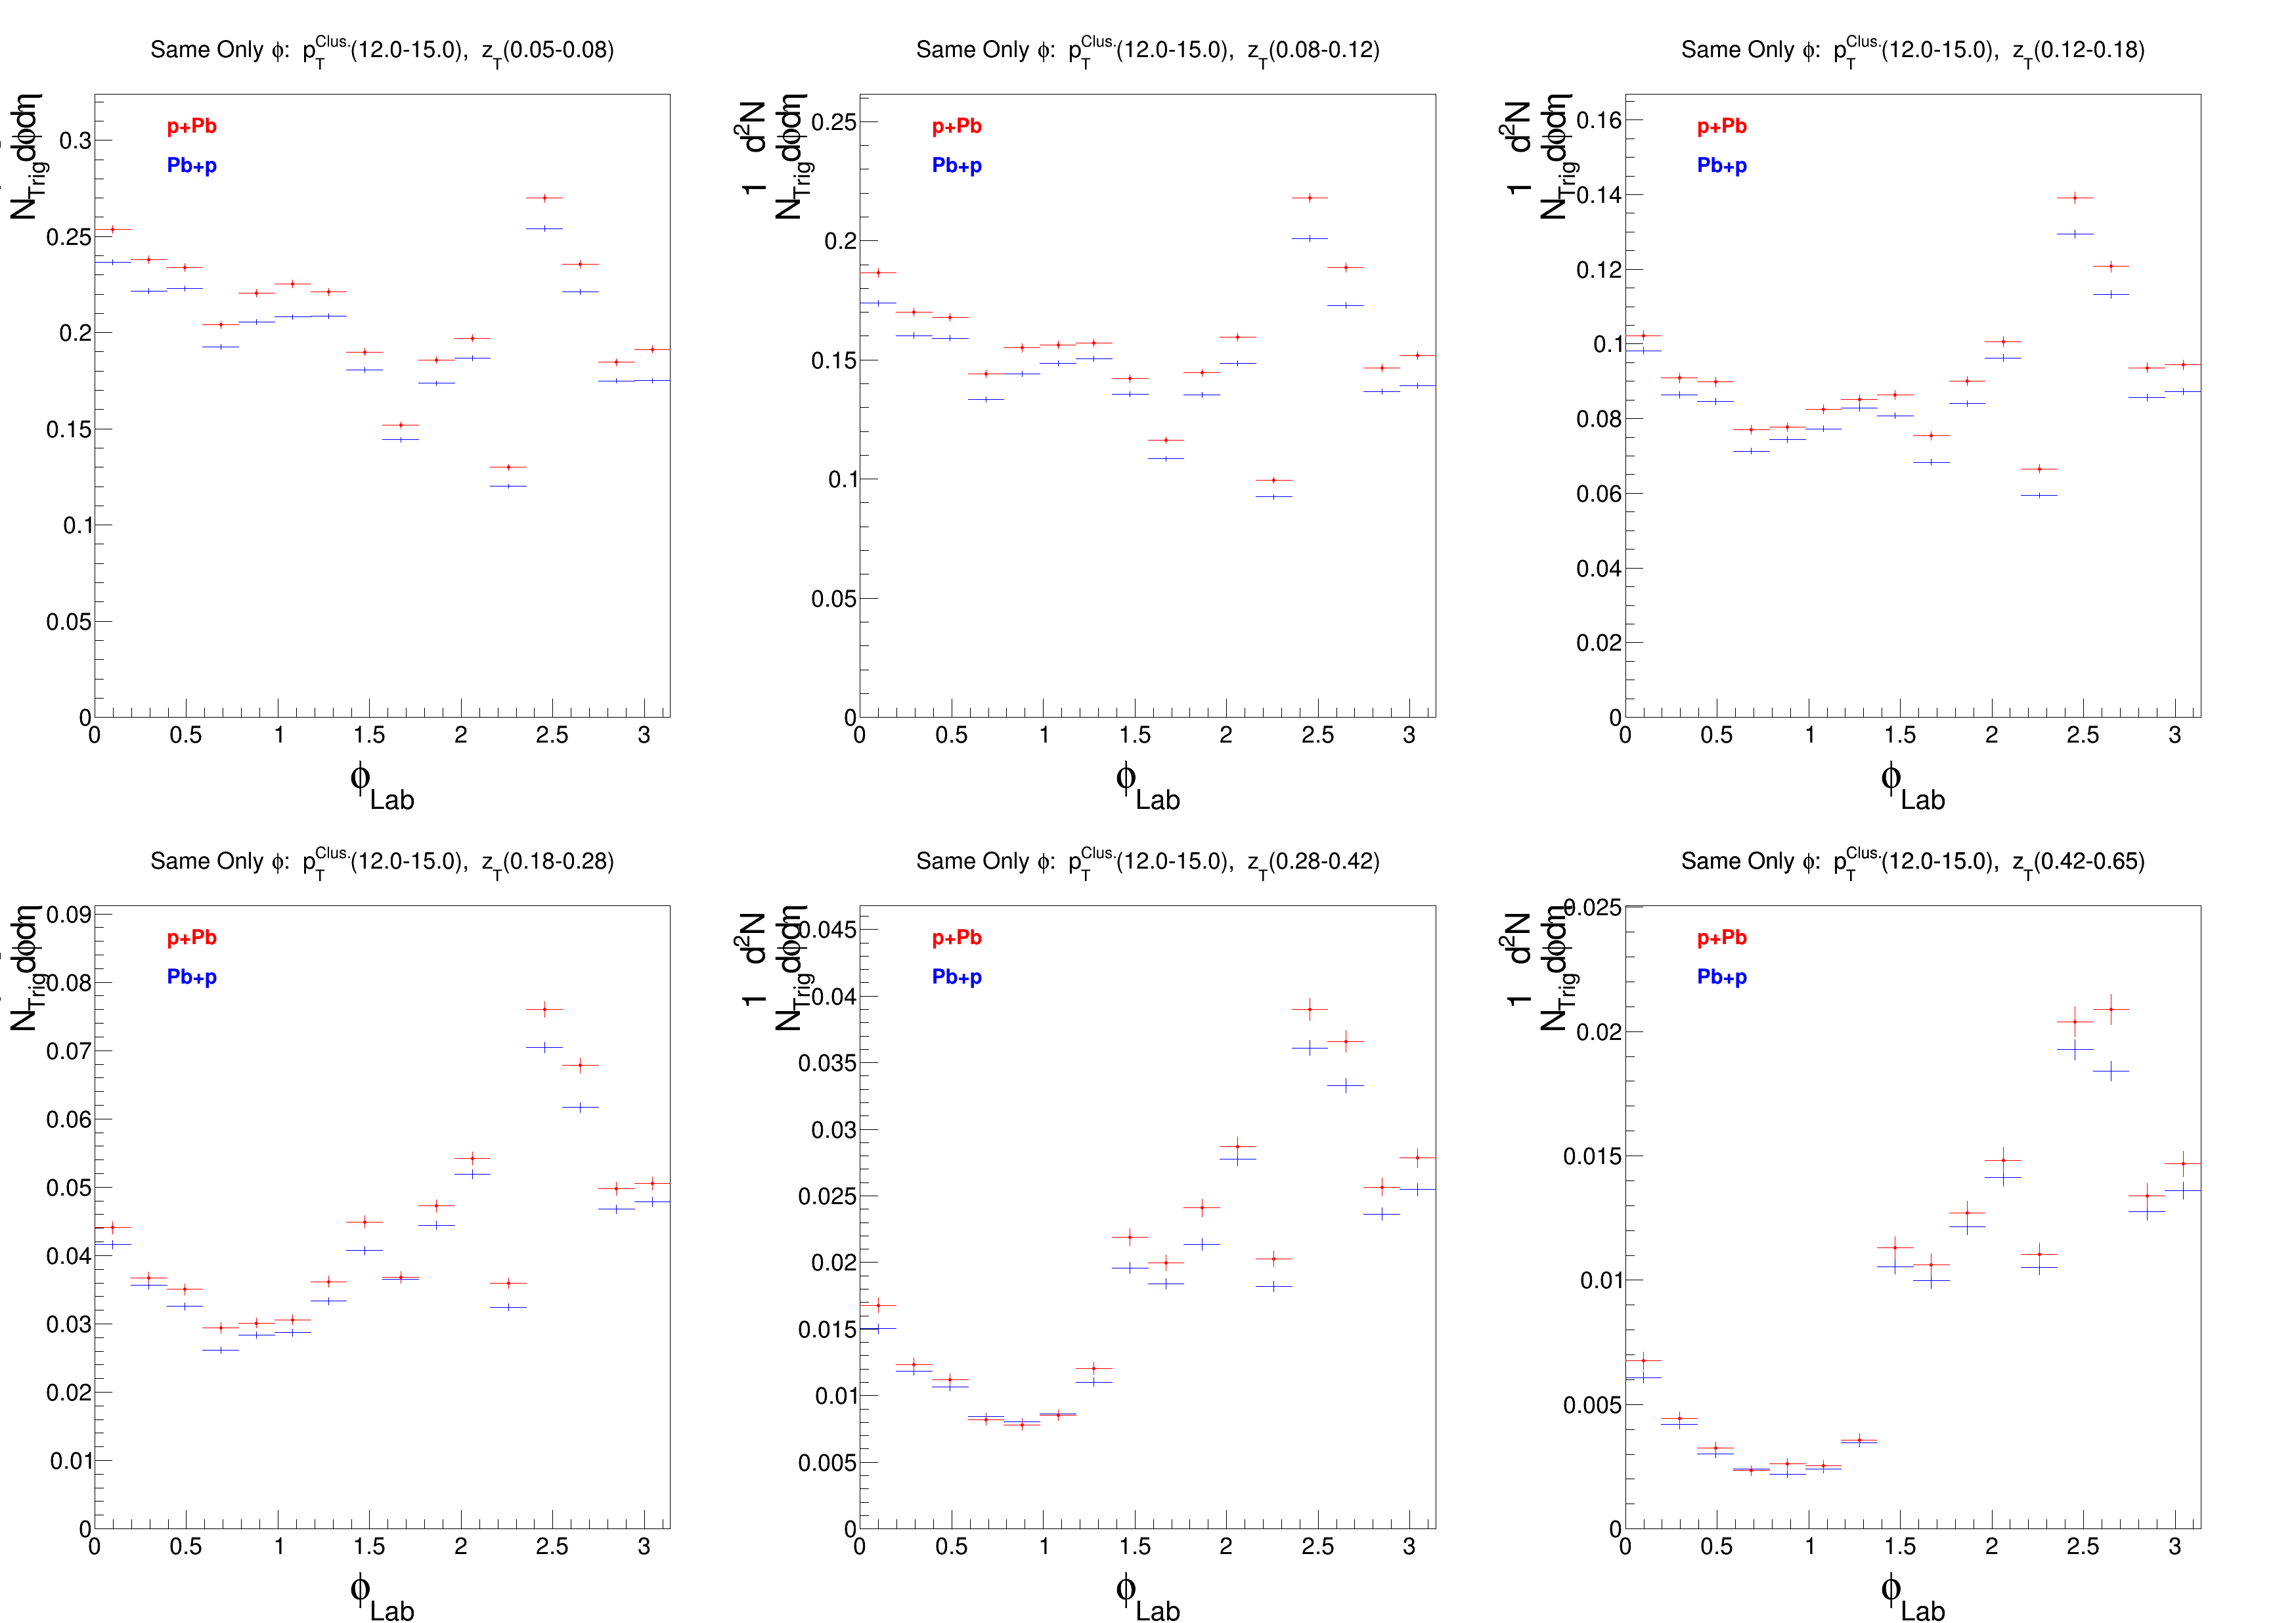

In [64]:
#RootFile1 = 'InputData/13f_4L_SE_Correlation_GMB_Ratio.root'
#RootFile2 = 'InputData/13d_4L_SE_Correlation_GMB_Ratio.root'
#RootFile1 = 'InputData/13f_4L_SE_Correlation.root'
#RootFile2 = 'InputData/13d_4L_SE_Correlation.root'
RootFile1 = 'InputData/13f_4L_SE_NN_Correlation.root'
RootFile2 = 'InputData/13d_4L_SE_NN_Correlation.root'
legend = [3]
for ptbin in range(3):
    if(ptbin > 0): continue
    ptbin = ptbin+2
    canvases = ROOT.TCanvas("canv_phi","canv_phi",3500,2500)
    canvases.Divide(3,2)
    legend[ptbin-2] = ROOT.TLegend(0.74,0.78,0.89,0.88)
    for ztbin in range(6):
    
        #grab
        hsig = GetPhi(RootFile1,ptbin,ztbin,"inclusive") #no subtraction, change DNN
        hsig2 = GetPhi(RootFile2,ptbin,ztbin,"inclusive")
        
        #hsig = GetEtaProj(RootFile1,ptbin,ztbin,True) #no subtraction, change DNN
        #hsig2 = GetEtaProj(RootFile2,ptbin,ztbin,True)
        #hsig2 = GetEtaProj(RootFile2,ptbin,ztbin,True)

        
        #same scale
        ymax = 1.2*max(hsig.GetMaximum(),hsig2.GetMaximum())
        hsig.GetYaxis().SetRangeUser(0,ymax)
        hsig2.GetYaxis().SetRangeUser(0,ymax)    
    
        #Signal
        canvases.cd(ztbin+1)
        hsig.SetMarkerColor(4)
        hsig.SetLineColor(4)
        hsig.SetLineWidth(1)
        hsig.SetTitle("Same Only #phi:  p_{T}^{Clus.}(%1.1f-%1.1f),  z_{T}(%1.2f-%1.2f)"
                   %(pTbins[ptbin],pTbins[ptbin+1],zTbins[ztbin],zTbins[ztbin+1]))
        hsig.Draw()
        hsig2.SetMarkerStyle(15)
        #hsig2.Scale(0.94)
        hsig2.SetMarkerColor(2)
        hsig2.SetMarkerColor(2)
        hsig2.SetLineColor(2)
        hsig2.SetLineWidth(1)
        hsig.GetXaxis().SetTitleOffset(0.9)
        hsig.GetXaxis().SetTitle("#phi")
        hsig2.Draw("same")
        
        
        latex = TLatex()
        latex.SetNDC()
        latex.SetTextSize(0.03)
        latex.DrawLatex(0.2,0.85, "#color[2]{p+Pb}")
        latex.DrawLatex(0.2,0.80, "#color[4]{Pb+p}")
        
        if(ztbin < 1):
            legend[ptbin-2].AddEntry(hsig, "13d","l")
            #legend[ptbin-2].AddEntry(hsig2, "13d","l")
        #legend[ptbin-2].Draw()
        #SetOwnership(legend, 0)
        
    
    canvases.Draw()   
    #canvases.SaveAs("pics/13fd_overlay_Eta_Same_Mix_Projections_Trigger_pt_%i.png"%(ptbin))

In [73]:
def GetClusterPhi(filename, ipt, izt, Signal_DNN=True):
    file = ROOT.TFile(filename)
        
    
    if (Signal_DNN == "inclusive"):
        PhiProjection = file.Get('cluster_phi')
    
    else:
        PhiProjection = file.Get('cluster_phi')
    
    PhiProjection.SetDirectory(0)
    #PhiProjection.Rebin(2)
    #EtaProjection.Scale(1.0/1.2) #scale by eta region
    ntriggers = Get_NTriggers(filename, prefix,ipt, Signal_DNN)
    print ntriggers
    PhiProjection.Scale(1.0/ntriggers) #per trigger yield
    
    PhiProjection.SetLineWidth(1)
    
    Plot1D(PhiProjection,ipt,izt,Signal_DNN)
    
    #zyam = EtaProjection.Integral(11,13)/3
    # how do I plot ZYAM, perhaps in both cases?
    #print('ZYAM=%f'%(zyam))
  
    #file.Close()
    return PhiProjection

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: canv_phi


114893.0
114893.0
55054.0
55054.0
114893.0
114893.0
55054.0
55054.0
114893.0
114893.0
55054.0
55054.0
114893.0
114893.0
55054.0
55054.0
114893.0
114893.0
55054.0
55054.0
114893.0
114893.0
55054.0
55054.0


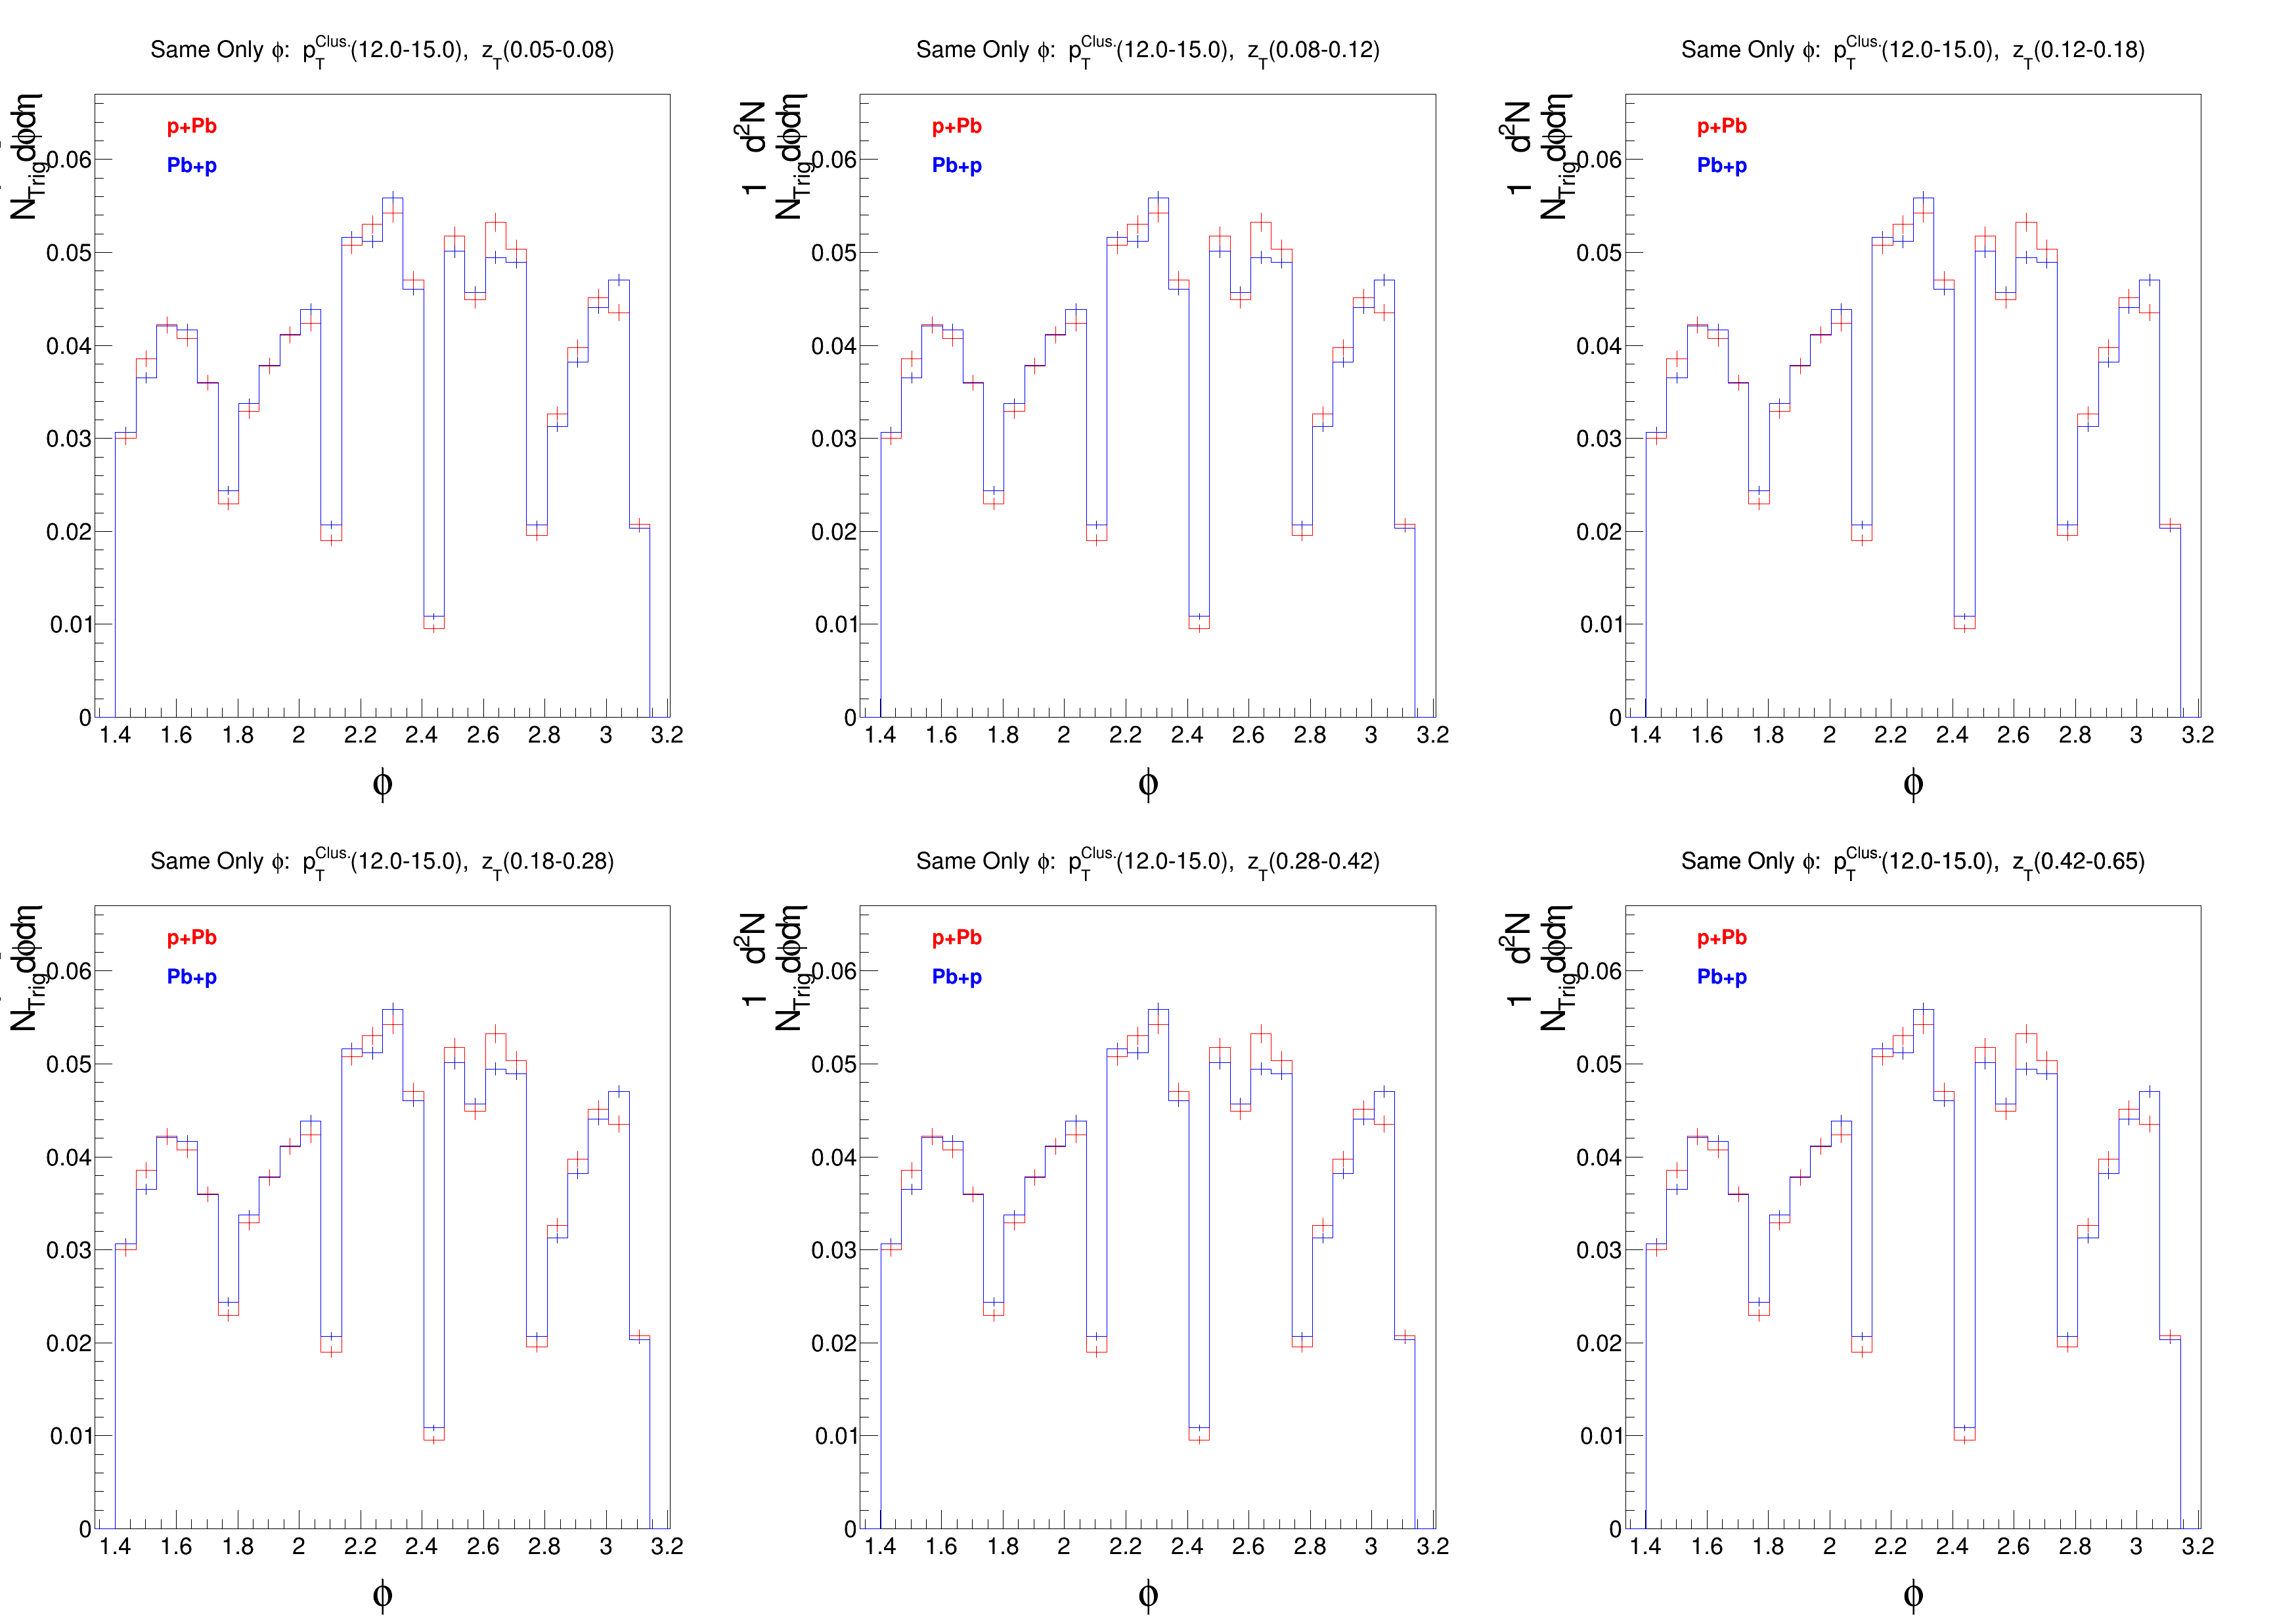

In [112]:
#RootFile1 = 'InputData/13f_4L_SE_Correlation_GMB_Ratio.root'
#RootFile2 = 'InputData/13d_4L_SE_Correlation_GMB_Ratio.root'
#RootFile1 = 'InputData/13f_4L_SE_Correlation.root'
#RootFile2 = 'InputData/13d_4L_SE_Correlation.root'
RootFile1 = 'InputData/13f_4L_SE_NN_Correlation.root'
RootFile2 = 'InputData/13d_4L_SE_NN_Correlation.root'
legend = [3]
for ptbin in range(3):
    if(ptbin > 0): continue
    ptbin = ptbin+2
    canvases = ROOT.TCanvas("canv_phi","canv_phi",3500,2500)
    canvases.Divide(3,2)
    legend[ptbin-2] = ROOT.TLegend(0.74,0.78,0.89,0.88)
    for ztbin in range(6):
    
        #grab
        hsig = GetClusterPhi(RootFile1,ptbin,ztbin,"inclusive") #no subtraction, change DNN
        hsig_Error = GetClusterPhi(RootFile1,ptbin,ztbin,"inclusive")
        hsig2 = GetClusterPhi(RootFile2,ptbin,ztbin,"inclusive")
        hsig2_Error = GetClusterPhi(RootFile2,ptbin,ztbin,"inclusive")
        
        #hsig = GetEtaProj(RootFile1,ptbin,ztbin,True) #no subtraction, change DNN
        #hsig2 = GetEtaProj(RootFile2,ptbin,ztbin,True)
        #hsig2 = GetEtaProj(RootFile2,ptbin,ztbin,True)

        
        #same scale
        ymax = 1.2*max(hsig.GetMaximum(),hsig2.GetMaximum())
        hsig.GetYaxis().SetRangeUser(0,ymax)
        hsig.GetXaxis().SetRangeUser(1.4,3.2)
        hsig2.GetYaxis().SetRangeUser(0,ymax)    
    
        #Signal
        canvases.cd(ztbin+1)
        hsig.SetMarkerColor(4)
        hsig.SetLineColor(4)
        hsig.SetLineWidth(1)
        hsig.SetTitle("Same Only #phi:  p_{T}^{Clus.}(%1.1f-%1.1f),  z_{T}(%1.2f-%1.2f)"
                   %(pTbins[ptbin],pTbins[ptbin+1],zTbins[ztbin],zTbins[ztbin+1]))
        

        hsig.Draw("HIST")
        hsig_Error.Draw("same")
        hsig2.SetMarkerStyle(15)
        #hsig2.Scale(0.94)
        hsig2.SetMarkerColor(2)
        hsig2.SetMarkerColor(2)
        hsig2.SetLineColor(2)
        hsig2.SetLineWidth(1)
        hsig.GetXaxis().SetTitleOffset(0.9)
        hsig.GetXaxis().SetTitle("#phi")
        hsig2.Draw("HISTsame")
        hsig2_Error.SetLineWidth(1)
        hsig2_Error.SetLineColorAlpha(ROOT.kRed,1)
        hsig2_Error.Draw("same")
        hsig.Draw("HISTsame")
        
        
        latex = TLatex()
        latex.SetNDC()
        latex.SetTextSize(0.03)
        latex.DrawLatex(0.2,0.85, "#color[2]{p+Pb}")
        latex.DrawLatex(0.2,0.80, "#color[4]{Pb+p}")
        
        if(ztbin < 1):
            legend[ptbin-2].AddEntry(hsig, "13d","l")
            #legend[ptbin-2].AddEntry(hsig2, "13d","l")
        #legend[ptbin-2].Draw()
        #SetOwnership(legend, 0)
        
    
    canvases.Draw()   
    #canvases.SaveAs("pics/13fd_overlay_Eta_Same_Mix_Projections_Trigger_pt_%i.png"%(ptbin))

In [77]:
def GetClusterEta(filename, ipt, izt, Signal_DNN=True):
    file = ROOT.TFile(filename)
        
    
    if (Signal_DNN == "inclusive"):
        PhiProjection = file.Get('cluster_eta')
    
    else:
        PhiProjection = file.Get('cluster_eta')
    
    PhiProjection.SetDirectory(0)
    #PhiProjection.Rebin(2)
    #EtaProjection.Scale(1.0/1.2) #scale by eta region
    ntriggers = Get_NTriggers(filename, prefix,ipt, Signal_DNN)
    print ntriggers
    PhiProjection.Scale(1.0/ntriggers) #per trigger yield
    
    PhiProjection.SetLineWidth(1)
    
    Plot1D(PhiProjection,ipt,izt,Signal_DNN)
    
    #zyam = EtaProjection.Integral(11,13)/3
    # how do I plot ZYAM, perhaps in both cases?
    #print('ZYAM=%f'%(zyam))
  
    #file.Close()
    return PhiProjection

TCanvas::Constructor:0: RuntimeWarning: Deleting canvas with same name: canv_phi


114893.0
55054.0
114893.0
55054.0
114893.0
55054.0
114893.0
55054.0
114893.0
55054.0
114893.0
55054.0
114893.0
55054.0
114893.0
55054.0
114893.0
55054.0
114893.0
55054.0
114893.0
55054.0
114893.0
55054.0


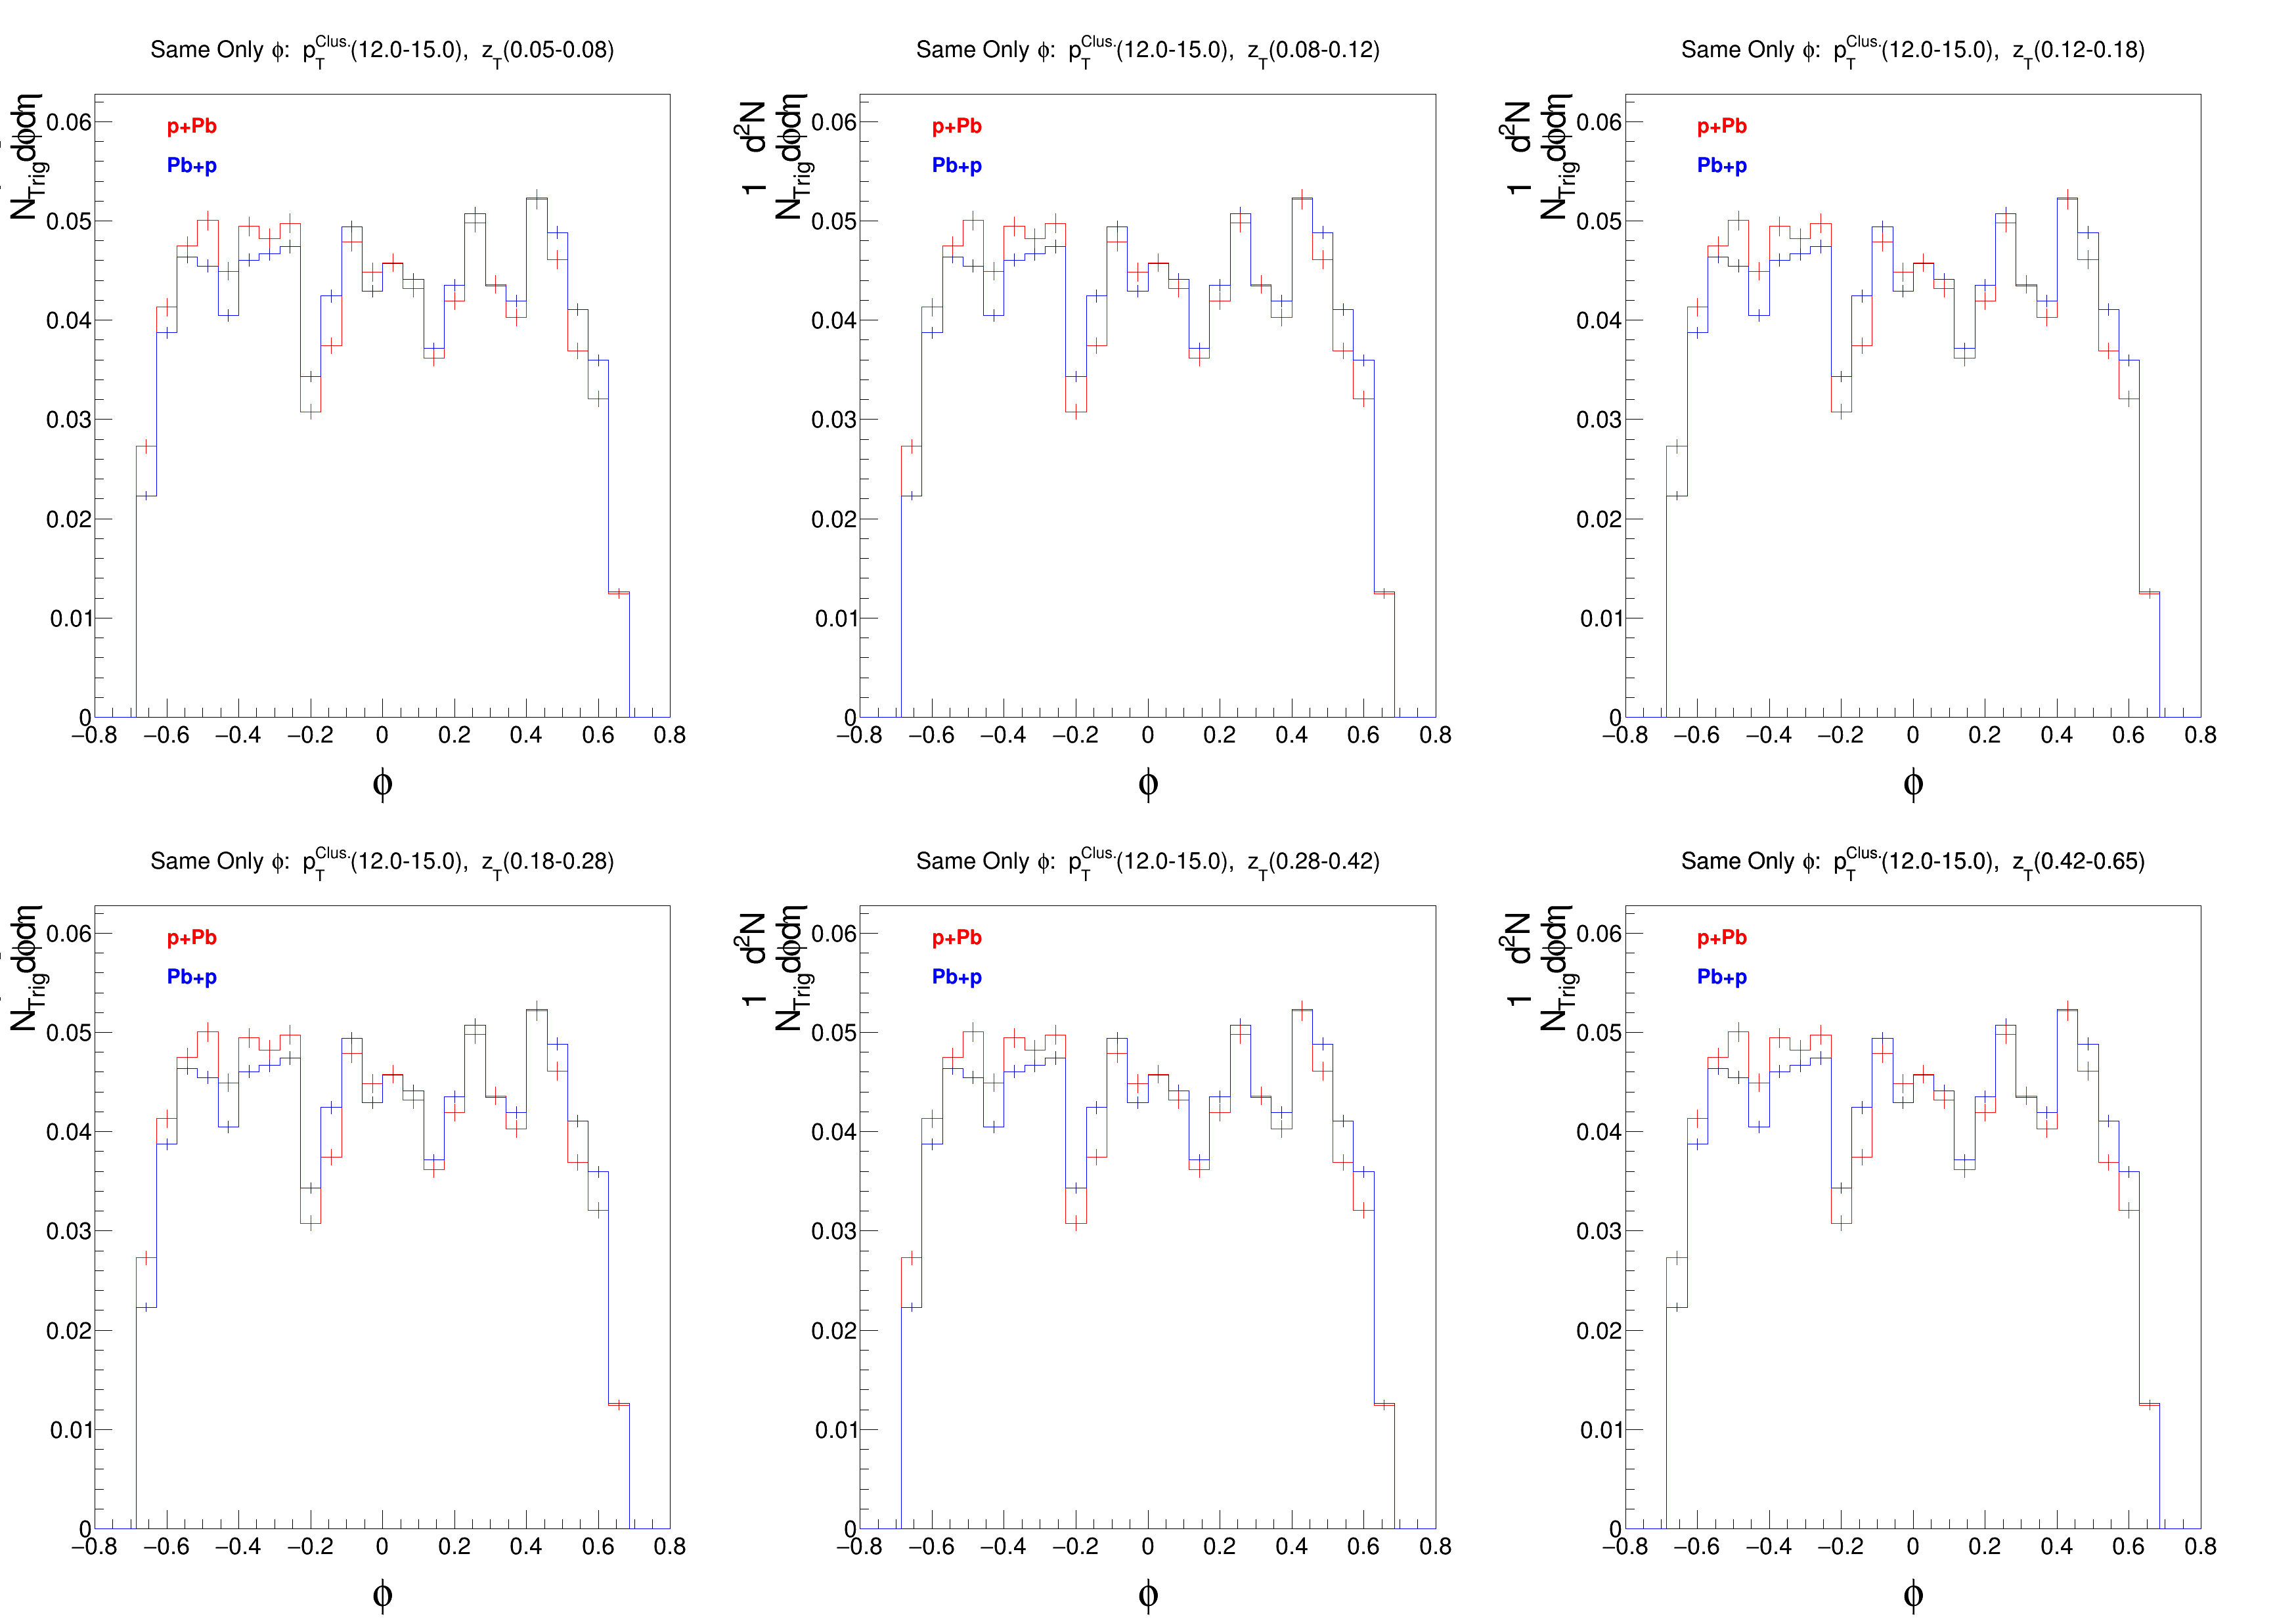

In [111]:
#RootFile1 = 'InputData/13f_4L_SE_Correlation_GMB_Ratio.root'
#RootFile2 = 'InputData/13d_4L_SE_Correlation_GMB_Ratio.root'
#RootFile1 = 'InputData/13f_4L_SE_Correlation.root'
#RootFile2 = 'InputData/13d_4L_SE_Correlation.root'
RootFile1 = 'InputData/13f_4L_SE_NN_Correlation.root'
RootFile2 = 'InputData/13d_4L_SE_NN_Correlation.root'
legend = [3]
for ptbin in range(3):
    if(ptbin > 0): continue
    ptbin = ptbin+2
    canvases = ROOT.TCanvas("canv_phi","canv_phi",3500,2500)
    canvases.Divide(3,2)
    legend[ptbin-2] = ROOT.TLegend(0.74,0.78,0.89,0.88)
    for ztbin in range(6):
    
        #grab
        hsig = GetClusterEta(RootFile1,ptbin,ztbin,"inclusive") #no subtraction, change DNN
        hsig2 = GetClusterEta(RootFile2,ptbin,ztbin,"inclusive")
        hsig_Error = GetClusterEta(RootFile1,ptbin,ztbin,"inclusive") #no subtraction, change DNN
        hsig2_Error = GetClusterEta(RootFile2,ptbin,ztbin,"inclusive")
        
        #hsig = GetEtaProj(RootFile1,ptbin,ztbin,True) #no subtraction, change DNN
        #hsig2 = GetEtaProj(RootFile2,ptbin,ztbin,True)
        #hsig2 = GetEtaProj(RootFile2,ptbin,ztbin,True)

        
        #same scale
        ymax = 1.2*max(hsig.GetMaximum(),hsig2.GetMaximum())
        hsig.GetYaxis().SetRangeUser(0,ymax)
        hsig.GetXaxis().SetRangeUser(1.4,3.2)
        hsig2.GetYaxis().SetRangeUser(0,ymax)    
    
        #Signal
        canvases.cd(ztbin+1)
        hsig.SetMarkerColor(4)
        hsig.SetLineColor(4)
        hsig.SetLineWidth(1)
        hsig.SetTitle("Same Only #phi:  p_{T}^{Clus.}(%1.1f-%1.1f),  z_{T}(%1.2f-%1.2f)"
                   %(pTbins[ptbin],pTbins[ptbin+1],zTbins[ztbin],zTbins[ztbin+1]))
        hsig.Draw("HIST")
        hsig_Error.Draw("same")
        hsig2.SetMarkerStyle(15)
        #hsig2.Scale(0.94)
        hsig2.SetMarkerColor(2)
        hsig2.SetMarkerColor(2)
        hsig2.SetLineColor(2)
        hsig2.SetLineWidth(1)
        hsig.GetXaxis().SetTitleOffset(0.9)
        hsig.GetXaxis().SetTitle("#phi")
        hsig2.Draw("HISTsame")
        hsig2_Error.SetLineWidth(1)
        hsig2_Error.SetLineColorAlpha(ROOT.kRed,1)
        hsig2_Error.Draw("same")
        hsig.Draw("HISTsame")
        
        
        latex = TLatex()
        latex.SetNDC()
        latex.SetTextSize(0.03)
        latex.DrawLatex(0.2,0.85, "#color[2]{p+Pb}")
        latex.DrawLatex(0.2,0.80, "#color[4]{Pb+p}")
        
        if(ztbin < 1):
            legend[ptbin-2].AddEntry(hsig, "13d","l")
            #legend[ptbin-2].AddEntry(hsig2, "13d","l")
        #legend[ptbin-2].Draw()
        #SetOwnership(legend, 0)
        
    
    canvases.Draw()   
    #canvases.SaveAs("pics/13fd_overlay_Eta_Same_Mix_Projections_Trigger_pt_%i.png"%(ptbin))